# Capstone Project: Let's make it a hit song!
#### By Marco Antonio Godoy

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Overview
For more than 20 years, I've been actively and passively involved in the highly competitive music industry, in roles related to music production, engineering, composition, songwriting, performance and consulting. I've had the opportunity to work with many artists from different nationalities, styles and backgrounds, in a wide array of projects, from collaborations (aka "no money") to fully funded productions backed by major record labels. Over the years, I've witnessed how some of these artists have achieved international recognition, while others have not been able to grow their local niche audiences. 

Surprisingly, the financial support that major labels provide to their artists doesn't always translate into successful acts. In fact, by leveraging the power of social media, some independent artists have been able to grow bigger audiences than some of their counterparts, even with much smaller marketing budgets. Moreover, I've noticed how fans seem to favor the charisma and big persona of some artists over the exceptional talent of others. However, one crucial differentiator between those who "make it" in the music business and those who don't is that behind every successful artist there's always a "hit" (top played) song. 

Therefore, I find in this capstone project the perfect opportunity to leverage AI/ML techniques with the goal of identifying the qualities and attributes that make a song a "hit".

# Business Understanding
Record labels spend fortunes in the development of artists, but they struggle to find songs that have potential to become hits. This might be the reason why some artists have resorted into recording cover songs (songs that have been recorded previously by other artists).

Therefore, designing a model that can predict with a high precision if a song has the potential to become a hit can translate into significant cost reductions for both the artists and the record labels since it would help reduce the "guess" work when choosing which songs to record and promote.

# Data Exploration

This analysis is primarily based on a dataset titled [Spotify Dataset 2023](https://www.kaggle.com/datasets/tonygordonjr/spotify-dataset-2023) by Tony Gordon available at Kaggle. The author did an exceptional job fetching the data from the Spotify API and organizing it into five subdatasets containing "albums", "artists data", "Spotify data", "features data" and "tracks data". The total columns for the entire dataset is 108, and the largest dataset ("tracks data") contains a total of 438,938 entries, and a feature named "track_popularity" which will be a crucial feature in this analysis. Although this dataset seems to contain all the data needed to work on this analysis, additional data may be obtained from the [Spotify API](https://developer.spotify.com/).

<p><b>IMPORTANT: As stated by the dataset provider, the dataset is updated through December 20, 2023. Therefore, the track_popularity information is valid through that date.</p>

We'll start by loading the source data into a Pandas dataframe and retrieving some high level information:

In [3]:
# Load Spotify consolidated data 
df = pd.read_csv('data/spotify_data_12_20_2023.csv', low_memory=False)

In [4]:
# Get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   album_id           375141 non-null  object 
 1   album_name         375141 non-null  object 
 2   album_popularity   375141 non-null  int64  
 3   album_type         375141 non-null  object 
 4   artists            375141 non-null  object 
 5   artist_0           375139 non-null  object 
 6   artist_1           87079 non-null   object 
 7   artist_2           38300 non-null   object 
 8   artist_3           13823 non-null   object 
 9   artist_4           6087 non-null    object 
 10  artist_id          375141 non-null  object 
 11  duration_sec       375141 non-null  float64
 12  label              375117 non-null  object 
 13  release_date       375119 non-null  object 
 14  total_tracks       375141 non-null  int64  
 15  track_id           375141 non-null  object 
 16  tr

In [5]:
# Display the first five entries
df.head(5)

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.382,True,0.0,2023.0,April,1
1,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', '22nd Jim']",AB,22nd Jim,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.193,True,1.0,2023.0,April,1
2,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', 'Veeze']",AB,Veeze,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.835,True,1.0,2023.0,April,1
3,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.252,True,0.0,2023.0,April,1
4,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.380,True,0.0,2023.0,April,1


# Data Preparation

We can observe that most of the columns contain complete information. However, there are some secondary columns such as "artist_1", "artist_2", "artist_3","artist_4", "genre_1", "genre_2", "genre_3", "genre_4" that contain incomplete information. We're going to remove these.  

In [6]:
# Drop artist and secondary genre columns
df_clean = df.drop(['artist_1', 'artist_2', 'artist_3', 'artist_4', 'genre_1', 'genre_2', 'genre_3', 'genre_4'], axis=1)

In [7]:
# Verify drop 
df_clean

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_id,duration_sec,label,release_date,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,08jcfs5JspUBqM3rbFNUzm,92.063,About Benjamin Records,2023-04-15 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.3820,True,0.0,2023.0,April,1
1,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', '22nd Jim']",AB,08jcfs5JspUBqM3rbFNUzm,125.320,About Benjamin Records,2023-04-15 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.1930,True,1.0,2023.0,April,1
2,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', 'Veeze']",AB,08jcfs5JspUBqM3rbFNUzm,139.800,About Benjamin Records,2023-04-15 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.8350,True,1.0,2023.0,April,1
3,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,08jcfs5JspUBqM3rbFNUzm,147.777,About Benjamin Records,2023-04-15 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.2520,True,0.0,2023.0,April,1
4,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,08jcfs5JspUBqM3rbFNUzm,102.600,About Benjamin Records,2023-04-15 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.3800,True,0.0,2023.0,April,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375136,1MPAXuTVL2Ej5x0JHiSPq8,Reputation Stadium Tour Surprise Song Playlist,76,album,['Taylor Swift'],Taylor Swift,06HL4z0CvFAxyc27GXpf02,267.653,"Big Machine Records, LLC",2017-11-09 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/2fF3QzbGCrtr...,audio_features,spotify:track:2fF3QzbGCrtrDXIdWcg1mv,0.6500,False,35.0,2017.0,November,1
375137,6fyR4wBPwLHKcRtxgd4sGh,Speak Now World Tour Live,60,album,['Taylor Swift'],Taylor Swift,06HL4z0CvFAxyc27GXpf02,315.173,"Big Machine Records, LLC",2010-10-25 00:00:00 UTC,...,5.0,https://api.spotify.com/v1/tracks/0BSmbCIY36iw...,audio_features,spotify:track:0BSmbCIY36iw04azzJ3S0S,0.2700,False,53.0,2010.0,October,1
375138,7mzrIsaAjnXihW3InKjlC3,Taylor Swift,75,album,['Taylor Swift'],Taylor Swift,06HL4z0CvFAxyc27GXpf02,207.106,"Big Machine Records, LLC",2006-10-24 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/2QA3IixpRcKy...,audio_features,spotify:track:2QA3IixpRcKyOdG7XDzRgv,0.5910,False,58.0,2006.0,October,1
375139,11gfxXxJPd3j6sdWUyEA5S,Taylor Swift Karaoke: Red,20,album,"['Taylor Swift', 'Ed Sheeran']",Taylor Swift,06HL4z0CvFAxyc27GXpf02,243.933,"Big Machine Records, LLC",2012-10-22 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/5cXTESo2BLCY...,audio_features,spotify:track:5cXTESo2BLCYwmUKF2uE8A,0.2690,False,7.0,2012.0,October,1


Additionally, since the focus of the analysis is on the attributes of the song and not on the album, we will drop the album related columns. 

In [8]:
# Drop album related columns
df_clean = df_clean.drop([
    'album_id', 
    'album_name', 
    'album_popularity', 
    'album_type', 
    'total_tracks', 
    'track_id', 
    'track_number'
], axis=1)

There also seems to be redundant information across the columns related to artists. We'll explore this:

In [9]:
# Explore arist related columns
df_clean[['artists','artist_0', 'name', 'artist_id']]

,artists,artist_0,name,artist_id
0,['AB'],AB,AB,08jcfs5JspUBqM3rbFNUzm
1,"['AB', '22nd Jim']",AB,AB,08jcfs5JspUBqM3rbFNUzm
2,"['AB', 'Veeze']",AB,AB,08jcfs5JspUBqM3rbFNUzm
3,['AB'],AB,AB,08jcfs5JspUBqM3rbFNUzm
4,['AB'],AB,AB,08jcfs5JspUBqM3rbFNUzm
...,...,...,...,...
375136,['Taylor Swift'],Taylor Swift,Taylor Swift,06HL4z0CvFAxyc27GXpf02
375137,['Taylor Swift'],Taylor Swift,Taylor Swift,06HL4z0CvFAxyc27GXpf02
375138,['Taylor Swift'],Taylor Swift,Taylor Swift,06HL4z0CvFAxyc27GXpf02
375139,"['Taylor Swift', 'Ed Sheeran']",Taylor Swift,Taylor Swift,06HL4z0CvFAxyc27GXpf02


As it can be observed, the "artists" column contains an array of artists that are featured of the track; the "artist_0" column holds the name of the primary artist, and the column "name" seems to also hold the name of the artist. 

Since the focus is on the characteristics of the track and not of the name of the artist, we will also drop these artist related columns, except for the artist popularity since we expect this to be an important factor.


In [10]:
# Drop artist related columns
df_clean = df_clean.drop(['artists','artist_0', 'artist_genres', 'name', 'artist_id', 'artist_genres', 'artist_popularity', 'followers'], axis=1)

In [11]:
# Verify drop
df_clean

,duration_sec,label,release_date,track_name,genre_0,acousticness,analysis_url,danceability,duration_ms,energy,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,92.063,About Benjamin Records,2023-04-15 00:00:00 UTC,Intro,NaN,0.03050,https://api.spotify.com/v1/audio-analysis/5Juc...,0.622,92064.0,0.554,...,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.3820,True,0.0,2023.0,April,1
1,125.320,About Benjamin Records,2023-04-15 00:00:00 UTC,Play It Cool,NaN,0.01120,https://api.spotify.com/v1/audio-analysis/4VWr...,0.899,125320.0,0.701,...,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.1930,True,1.0,2023.0,April,1
2,139.800,About Benjamin Records,2023-04-15 00:00:00 UTC,3 Peat,NaN,0.08150,https://api.spotify.com/v1/audio-analysis/6JsV...,0.782,139800.0,0.716,...,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.8350,True,1.0,2023.0,April,1
3,147.777,About Benjamin Records,2023-04-15 00:00:00 UTC,Affiliated,NaN,0.00413,https://api.spotify.com/v1/audio-analysis/7pZp...,0.944,147778.0,0.582,...,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.2520,True,0.0,2023.0,April,1
4,102.600,About Benjamin Records,2023-04-15 00:00:00 UTC,Springfield,NaN,0.01290,https://api.spotify.com/v1/audio-analysis/0ylq...,0.527,102600.0,0.641,...,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.3800,True,0.0,2023.0,April,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375136,267.653,"Big Machine Records, LLC",2017-11-09 00:00:00 UTC,The Story Of Us,pop,0.00556,https://api.spotify.com/v1/audio-analysis/2fF3...,0.547,267653.0,0.808,...,4.0,https://api.spotify.com/v1/tracks/2fF3QzbGCrtr...,audio_features,spotify:track:2fF3QzbGCrtrDXIdWcg1mv,0.6500,False,35.0,2017.0,November,1
375137,315.173,"Big Machine Records, LLC",2010-10-25 00:00:00 UTC,Drops Of Jupiter - Live/2011,pop,0.80600,https://api.spotify.com/v1/audio-analysis/0BSm...,0.374,315173.0,0.504,...,5.0,https://api.spotify.com/v1/tracks/0BSmbCIY36iw...,audio_features,spotify:track:0BSmbCIY36iw04azzJ3S0S,0.2700,False,53.0,2010.0,October,1
375138,207.106,"Big Machine Records, LLC",2006-10-24 00:00:00 UTC,The Outside,pop,0.00491,https://api.spotify.com/v1/audio-analysis/2QA3...,0.589,207107.0,0.805,...,4.0,https://api.spotify.com/v1/tracks/2QA3IixpRcKy...,audio_features,spotify:track:2QA3IixpRcKyOdG7XDzRgv,0.5910,False,58.0,2006.0,October,1
375139,243.933,"Big Machine Records, LLC",2012-10-22 00:00:00 UTC,Everything Has Changed - Instrumental With Bac...,pop,0.12400,https://api.spotify.com/v1/audio-analysis/5cXT...,0.581,243933.0,0.469,...,4.0,https://api.spotify.com/v1/tracks/5cXTESo2BLCY...,audio_features,spotify:track:5cXTESo2BLCYwmUKF2uE8A,0.2690,False,7.0,2012.0,October,1


The "release_date" column contains the exact date when the album was released. However, since the focus of the analysis is on the attributes of songm the relase data does not seem like a relevant factor. Therefore, we will also drop the "release" related features, including "release_date" and "release_year" and "release_month", columns:   

In [12]:
# Drop unnecessary release date information
df_clean = df_clean.drop(['release_date', 'release_year', 'release_month'], axis=1)

The "label" column holds the name of the record label that released the track. We want to explore how many different values this column holds to make a determination if it should be dropped.


In [13]:
# Get value counts for label column
df_clean['label'].value_counts()

Sami Springs              3395
CC Entertainment          3197
Columbia                  2316
Legacy Recordings         2058
Ameritz Music Ltd         2040
                          ... 
FUJI JR                      1
ARTIST DISTRIBUTION          1
WEST JAVA MUSIC RECORD       1
Rod Truss                    1
2078922 Records DK2          1
Name: label, Length: 29639, dtype: int64

Although it is reasonable to thing that the marketing budget of major labels might be a significant factor in making a track a hit, the fact that there are a total of 29639 different record labels (major and independent) might make the computation of our analysis less efficient. Therefore, we will drop this column for now.


In [14]:
# Drop label column
df_clean = df_clean.drop('label', axis=1)

There are other columns that hold information such as the "analysis_url", "track_href", "uri", "type" and "rn". These seem to be specific addresses to additional metadata available from Spotify. We don't consider these to be a major factor in the outcome of our analysis. Therefore, we will drop these as well.

In [15]:
# Drop unnecessary metadata
df_clean = df_clean.drop(['analysis_url', 'uri', 'track_href', 'type', 'rn'], axis=1)

Although it is reasonable to believe that the name of a song might have an influence in its popularity, we don't expect this to be a major factor. Therefore, we will drop this column at this stage as well.


In [16]:
# Drop track name
df_clean = df_clean.drop('track_name', axis=1)

Also, we can observe that there are two columns with the track duration: one in seconds and the other onw in milliseconds. We're going to remove the column that contains the data in milliseconds.


In [17]:
# Remove redundant duration column 
df_clean = df_clean.drop('duration_ms', axis=1)

In [18]:
# Verify drops
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_sec      375141 non-null  float64
 1   genre_0           209863 non-null  object 
 2   acousticness      374364 non-null  float64
 3   danceability      374364 non-null  float64
 4   energy            374364 non-null  float64
 5   instrumentalness  374364 non-null  float64
 6   key               374364 non-null  float64
 7   liveness          374364 non-null  float64
 8   loudness          374364 non-null  float64
 9   mode              374364 non-null  float64
 10  speechiness       374364 non-null  float64
 11  tempo             374364 non-null  float64
 12  time_signature    374364 non-null  float64
 13  valence           374364 non-null  float64
 14  explicit          375131 non-null  object 
 15  track_popularity  375131 non-null  float64
dtypes: float64(14), obje

After having dropped the columns we don't consider necessary, we can observe that there's some missing information in the columns we selected. We're going to drop the entries with missing information.  

In [19]:
# Drop entries with missing values
df_clean = df_clean.dropna()

The resulting "clean" dataframe is provided below:

In [20]:
# Verify drop
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209364 entries, 334 to 375140
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_sec      209364 non-null  float64
 1   genre_0           209364 non-null  object 
 2   acousticness      209364 non-null  float64
 3   danceability      209364 non-null  float64
 4   energy            209364 non-null  float64
 5   instrumentalness  209364 non-null  float64
 6   key               209364 non-null  float64
 7   liveness          209364 non-null  float64
 8   loudness          209364 non-null  float64
 9   mode              209364 non-null  float64
 10  speechiness       209364 non-null  float64
 11  tempo             209364 non-null  float64
 12  time_signature    209364 non-null  float64
 13  valence           209364 non-null  float64
 14  explicit          209364 non-null  object 
 15  track_popularity  209364 non-null  float64
dtypes: float64(14), ob

In [21]:
data_loss = len(df_clean)/len(df)
print(data_loss)

0.5580941565971195


<b>Important: Notice that the total number of entries on the clean dataset is 209,364. This represents a data loss of ~46% when compared the original dataset</b>

In [22]:
# Get stats summary on the resulting datase
df_clean.describe()

,duration_sec,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity
count,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000
mean,223.080094,0.390705,0.559192,0.534689,0.247641,5.256830,0.205003,-10.997748,0.650078,0.101287,118.340800,3.869476,0.456605,15.502847
std,115.984649,0.367553,0.193325,0.273731,0.368983,3.572019,0.186455,6.744645,0.476946,0.134646,30.591081,0.521341,0.269739,18.095373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,168.693000,0.035100,0.434000,0.315000,0.000000,2.000000,0.097000,-13.879250,0.000000,0.036000,94.981000,4.000000,0.228000,1.000000
50%,211.588000,0.262000,0.583000,0.559000,0.000626,5.000000,0.126000,-9.035000,1.000000,0.048200,118.743500,4.000000,0.444000,8.000000
75%,258.059000,0.767000,0.703000,0.762000,0.605000,8.000000,0.250000,-6.240000,1.000000,0.093000,137.346000,4.000000,0.673000,25.000000
max,5280.026000,0.996000,0.988000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,0.968000,247.981000,5.000000,1.000000,99.000000


<Axes: >

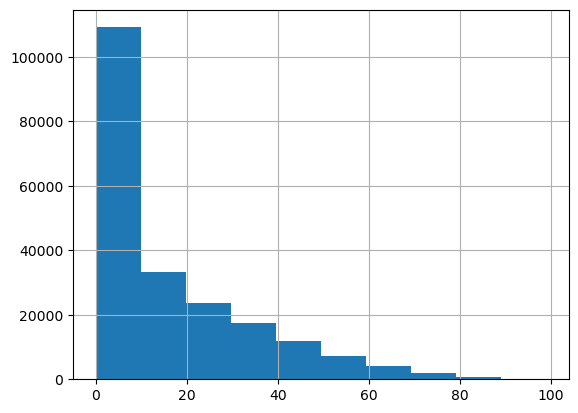

In [23]:
# Visualize track popularity
df_clean['track_popularity'].hist()

A very important observation we should make at this point is that the mean of the "track_popularity" on the clean dataframe is 15.5, while the highest "track_popularity" value is 99, and the std is ~18

Next, we should explore what's the correlation of the track popularity with the other numerical features.

<Axes: >

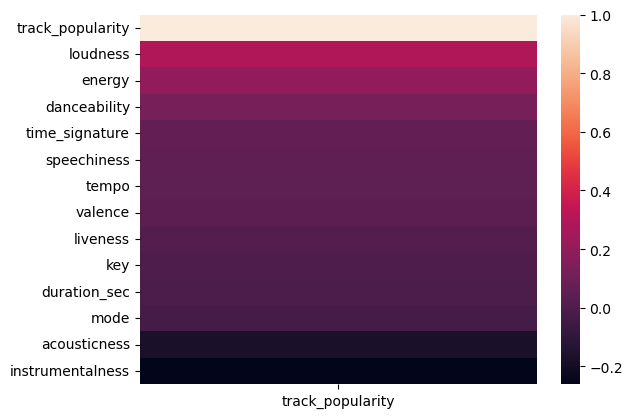

In [24]:
# Get heatmap of data correlations
sns.heatmap(df_clean.corr(numeric_only=True)[['track_popularity']].sort_values(by='track_popularity', ascending=False))

### Determining The Popularity Threshold

We need to make a determination on what is considered a hit track. According to the website [House of Tracks](https://houseoftracks.com/faq/what-qualifies-a-song-as-a-hit), there are many factors that can contribute to whether or not a song becomes popular. They claim that in the United States and the United Kingdom, a single is usually considered a hit when it reaches the top 40 of the Billboard Hot 100 or the top 75 of the UK Singles Chart and stays there for at least one week. Moreover, the Guinness Book of British Hit Singles has used this definition since the 1970s.

Since the our dataset contains a feature named "track_popularity", we will start by exploring the features of the top 100 most popular songs in Spotify. Later in the analysis, we'll look into cross validating our results with the data from Billboard.

In [25]:
# Get top 100 tracks sorted by popularity in descending order. 
spotify_top100= df_clean.sort_values(by='track_popularity', ascending=False).head(100)

In [26]:
# Explore dataframe
spotify_top100

,duration_sec,genre_0,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,explicit,track_popularity
364635,241.106,dance pop,0.1640,0.336,0.627,0.000000,7.0,0.0708,-7.463,1.0,0.0384,150.273,4.0,0.350,False,99.0
374458,178.426,pop,0.1170,0.552,0.702,0.000021,9.0,0.1050,-5.707,1.0,0.1570,169.994,4.0,0.564,False,99.0
361959,137.773,brooklyn indie,0.8680,0.504,0.308,0.135000,9.0,0.1580,-14.958,1.0,0.0321,113.950,4.0,0.121,False,98.0
374139,162.767,reggaeton,0.0887,0.911,0.778,0.000022,5.0,0.1790,-2.248,1.0,0.2620,96.057,4.0,0.345,True,97.0
374103,267.194,reggaeton,0.1500,0.787,0.621,0.000402,4.0,0.5800,-5.009,0.0,0.0680,139.056,4.0,0.130,True,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353497,194.543,pop,0.7360,0.768,0.644,0.000837,5.0,0.1730,-6.671,0.0,0.1360,95.050,4.0,0.530,False,87.0
370051,157.560,dfw rap,0.5330,0.755,0.522,0.000000,2.0,0.0685,-4.368,1.0,0.0575,89.960,4.0,0.925,False,87.0
369575,109.750,hip pop,0.5190,0.770,0.580,0.000127,0.0,0.2330,-8.393,1.0,0.2470,144.072,4.0,0.753,True,87.0
354123,68.760,adult standards,0.7420,0.684,0.437,0.000016,9.0,0.2240,-10.522,1.0,0.0491,107.607,4.0,0.964,False,87.0


In [27]:
# Get summary stats on top 100 tracks
spotify_top100.describe()

,duration_sec,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity
count,100.00000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,222.45049,0.240551,0.629950,0.611191,3.956585e-03,5.310000,0.191412,-6.748190,0.600000,0.093039,116.416440,3.960000,0.431830,89.610000
std,71.06563,0.272343,0.151306,0.176353,1.978225e-02,3.697378,0.145874,3.044413,0.492366,0.096394,29.404494,0.196946,0.253389,2.817317
min,68.76000,0.000307,0.319000,0.091100,0.000000e+00,0.000000,0.023200,-17.665000,0.000000,0.025400,75.956000,3.000000,0.049900,87.000000
25%,185.57750,0.051225,0.521750,0.516500,0.000000e+00,1.750000,0.099075,-7.886250,0.000000,0.035425,93.031250,4.000000,0.212000,87.750000
50%,216.64500,0.120500,0.630000,0.640500,5.250000e-07,5.500000,0.133500,-5.955000,1.000000,0.051600,112.620500,4.000000,0.396500,89.000000
75%,242.54975,0.339000,0.747500,0.725000,3.720000e-05,8.250000,0.234000,-4.759000,1.000000,0.084900,136.175750,4.000000,0.634250,91.000000
max,613.02600,0.959000,0.949000,0.965000,1.350000e-01,11.000000,0.765000,-2.248000,1.000000,0.478000,191.385000,4.000000,0.969000,99.000000


As it can be observed in the dataframe the minimum value for the track popularity is 87. It seems reasonable that we should expand our query to include all songs that have at least a popularity of 87 

In [28]:
# Create subset with tracks of popularity equal or greater than 87
spotify_popularity_gt_87 = df_clean.query('track_popularity >= 87').sort_values(by='track_popularity', ascending=False)

In [29]:
# Explore new dataframe
spotify_popularity_gt_87

,duration_sec,genre_0,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,explicit,track_popularity
364635,241.106,dance pop,0.16400,0.336,0.627,0.000000,7.0,0.0708,-7.463,1.0,0.0384,150.273,4.0,0.350,False,99.0
374458,178.426,pop,0.11700,0.552,0.702,0.000021,9.0,0.1050,-5.707,1.0,0.1570,169.994,4.0,0.564,False,99.0
361959,137.773,brooklyn indie,0.86800,0.504,0.308,0.135000,9.0,0.1580,-14.958,1.0,0.0321,113.950,4.0,0.121,False,98.0
374139,162.767,reggaeton,0.08870,0.911,0.778,0.000022,5.0,0.1790,-2.248,1.0,0.2620,96.057,4.0,0.345,True,97.0
374103,267.194,reggaeton,0.15000,0.787,0.621,0.000402,4.0,0.5800,-5.009,0.0,0.0680,139.056,4.0,0.130,True,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371209,224.000,barbadian pop,0.07170,0.509,0.637,0.000011,4.0,0.0789,-4.830,0.0,0.0471,172.006,3.0,0.378,True,87.0
371873,297.786,detroit hip hop,0.06220,0.548,0.847,0.000000,1.0,0.0816,-3.237,1.0,0.1860,171.447,4.0,0.100,True,87.0
371942,350.320,detroit hip hop,0.02150,0.802,0.755,0.000000,4.0,0.2950,-3.138,0.0,0.0564,130.027,4.0,0.580,True,87.0
372880,229.146,chicago rap,0.14500,0.367,0.665,0.000000,1.0,0.1130,-2.821,1.0,0.0465,148.913,4.0,0.310,True,87.0


Our last query resulted in 9 additional entries, for a total of 109 entires. 

In [30]:
# Get summary stats on popular tracks
spotify_popularity_gt_87.describe()

,duration_sec,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,222.784422,0.225513,0.631266,0.621946,0.003634,5.366972,0.193337,-6.653147,0.577982,0.092736,117.546587,3.954128,0.427587,89.394495
std,69.979944,0.266611,0.150016,0.176765,0.018971,3.713490,0.145558,2.974199,0.496163,0.094401,29.461839,0.210173,0.248158,2.792246
min,68.760000,0.000060,0.319000,0.091100,0.000000,0.000000,0.023200,-17.665000,0.000000,0.025400,75.956000,3.000000,0.049900,87.000000
25%,185.586000,0.048400,0.522000,0.521000,0.000000,2.000000,0.100000,-7.807000,0.000000,0.036000,93.986000,4.000000,0.216000,87.000000
50%,216.880000,0.106000,0.631000,0.643000,0.000001,6.000000,0.135000,-5.870000,1.000000,0.051700,113.950000,4.000000,0.388000,88.000000
75%,243.440000,0.322000,0.747000,0.730000,0.000037,9.000000,0.237000,-4.775000,1.000000,0.090300,136.952000,4.000000,0.624000,91.000000
max,613.026000,0.959000,0.949000,0.965000,0.135000,11.000000,0.765000,-2.248000,1.000000,0.478000,191.385000,4.000000,0.969000,99.000000


As we can see on the previus table, the mean of the track_popularity on the top songs (109 entries) is ~89, which is more than 5x the mean of the track_popularity of the entire clean dataframe.    

<b>IMPORTANT: Considering that the total number of entries in the clean dataset is 209,351, selecting only 109 entries to be labeled as "hits" will create a highly imbalance dataset. Therefore, while we will still focus on the top 100 entries to cross validate our model with the Billboard data, wfor training purposes we will expand our query to include the top 1% most popular songs.</b>


In [31]:
# Create a secondary dataframe with the top 1% most popular tracks
spotify_top1pct= df_clean.sort_values(by='track_popularity', ascending=False).head(round(len(df_clean)*0.01))

In [32]:
# Get summary stats on top 1% most popular tracks
spotify_top1pct.describe()

,duration_sec,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
mean,220.012809,0.250211,0.635579,0.625996,0.027481,5.198185,0.183205,-6.946497,0.600287,0.101587,120.615126,3.940783,0.473893,77.478988
std,56.302719,0.272456,0.154559,0.189747,0.120080,3.606330,0.146182,3.063227,0.489956,0.099065,28.715520,0.350181,0.236575,4.826001
min,36.226000,0.000005,0.000000,0.003120,0.000000,0.000000,0.021500,-38.986000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000
25%,184.638500,0.033600,0.535250,0.501250,0.000000,2.000000,0.095425,-8.446250,0.000000,0.037700,97.013250,4.000000,0.288250,74.000000
50%,215.115000,0.129500,0.647000,0.645500,0.000002,5.000000,0.123000,-6.338500,1.000000,0.055450,119.973500,4.000000,0.461500,76.000000
75%,247.149250,0.401000,0.750000,0.768000,0.000193,8.000000,0.222000,-4.854500,1.000000,0.124000,139.930500,4.000000,0.653750,80.000000
max,613.026000,0.994000,0.967000,0.989000,0.982000,11.000000,0.953000,-0.504000,1.000000,0.592000,207.924000,5.000000,0.978000,99.000000


<b>IMPORTANT: Notice that the total entries on the top %1 query is 2094, which is ~10 of the entire clean dataset, and the mean track popularity on this top 1% subset is ~77.5. Although these entries might not represent "hits" (i.e. the music industry does not really look for the top 2000 songs), the decision to use the top %1 seems more appropriate for the training of our models. </b>

Some additional observations arise from the stats summary presented above:
- The first one is that the mean of the the "instrumentalness" feature (weather the track is instrumental or not) for this top 1%  most popular songs is near to 0. This is not surprising since, except in classical music, it's rare for an instrumental song to become a hit. 
- The second observation relates to loudness. This refers to how loud or soft a track is (or perceived). This feature seems to relate more on the audio engineering aspect of a track instead of a creative factor. Therefore, we should remove the these feature from the analysis as well.  

Based on the observations mentioned above we're going to remove the "instrumentalness" and "loudness" from the datasets:

In [33]:
# Drop "instrumentalness" feature from parsed datasets
df_clean = df_clean.drop(['instrumentalness', 'loudness'], axis=1)
spotify_top1pct = spotify_top1pct.drop(['instrumentalness', 'loudness'], axis=1)
spotify_popularity_gt_87 = spotify_popularity_gt_87.drop(['instrumentalness', 'loudness'], axis=1)

## Data Transformation

In [34]:
# Package imports 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer

<b>Attention: During the first iteration of the modeling process it was determined that the computing resources available for this analysis could not handle the large dataset. Therefore, the following steps will create a subset of the clean dataframe that is more suitable for the available training environment: </b>

In [35]:
# Create a subset of the clean dataframe only containing entries where the track popularity is less than the mean of the track popularity of the entire clean dataframe
df_clean_popularity_mean = (df_clean[df_clean['track_popularity'] <= df_clean['track_popularity'].mean()])

In [36]:
# Get reduction percentage of newly reduced dataframe
print("Total entries (after reduction):", len(df_clean_popularity_mean))
print("Size reduction:", 1 - len(df_clean_popularity_mean) / len(df_clean))

Total entries (after reduction): 130595
Size reduction: 0.37622991536271755


Although we were able to reduce the size by ~37.6%, with 130595 entries the dataset might still be too large. Therefore, we're going to continue the subsetting based on the  track popularity. 

In [37]:
# Describe reduced dataset 
df_clean_popularity_mean['track_popularity'].describe()

count    130595.000000
mean          3.813507
std           4.609386
min           0.000000
25%           0.000000
50%           2.000000
75%           7.000000
max          15.000000
Name: track_popularity, dtype: float64

As we can see, the mean of the track popularity on the reduced datase is 3.81. However, the dataset still  contains 130595 entries, which might be too large. Let's explore the data via a histogram:  
  

<Axes: >

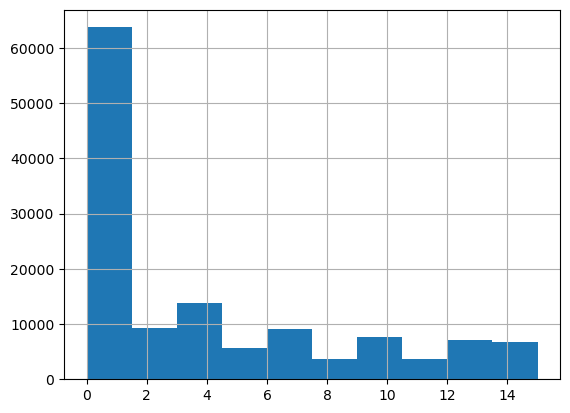

In [38]:
# Generate histogram of track popularity for the mean popularity 
df_clean_popularity_mean['track_popularity'].hist()

As we can see on the histogram, the popularity of the vast majority of the entries falls below 2. Therefore, we're going to reduce the dataset further to only include tracks that have a popularity less than 2: 

In [39]:
# Create a new dataset with the track of popularity 2 or less 
df_clean_non_popular_tracks = (df_clean.query('track_popularity <= 2'))

In [40]:
# Get reduction percentage of newly reduced dataframe
print("Total entries (after reduction):", len(df_clean_non_popular_tracks))
print("Size reduction:", 1 - len(df_clean_non_popular_tracks) / len(df_clean))

Total entries (after reduction): 72973
Size reduction: 0.6514539271316941


As shown above, after further subsetting the data, we were able to reduce it by 65% of the size of the clean dataset. With a total of 72973, we still believe the data might too large considering the limited resources. Therefore, we're going to use a sample that represents 10% of the already reduced dataset:



In [41]:
# Get a sample that contains 10% of the non popular dataset 
df_clean_reduced = df_clean_non_popular_tracks.sample(frac=0.10)

In [42]:
# Get length of dataset holding unpopular songs
len(df_clean_reduced)

7297

Since the "df_clean_reduced" dataframe holds the entries for what determined to be "unpopular" songs, we're going to label these as "hit = no".

In [43]:
# Set target variable on the reduced clean dataset (10% sample)
df_clean_reduced['hit'] = 'no'

Although the goal of the analysis is to determine if a song has the characteristics to be on the top 100 most popular songs (Spotify), the fact that the class holding the unpopular songs holds a todal of 7,297 entries would result in a highly imbalanced dataset. Therefore, at this point it seems more appropriate to use the top 1% instead as the "hit" songs instead of the songs with popularity greater than 87.  

In [44]:
# Label the top 1% most popular songs with feature "hit = yes"
spotify_top1pct['hit'] = 'yes'

Now, we are ready to concatenate the two datasets: 

In [45]:
# Concatenate least popular with most popular tracjs 
df_clean_final = pd.concat([df_clean_reduced, spotify_top1pct])

Finally, we're going to drop the "track_popularity" column since this is represented by the "hit" (target) column:

In [46]:
# Drop tje "track_popularity" columns
df_clean_final = df_clean_final.drop('track_popularity', axis=1)

In [47]:
# Explore resulting concatenated dataframe
df_clean_final

,duration_sec,genre_0,acousticness,danceability,energy,key,liveness,mode,speechiness,tempo,time_signature,valence,explicit,hit
168951,254.440,latin christian,0.62900,0.6020,0.874000,5.0,0.1210,1.0,0.0321,164.952,4.0,0.9710,False,no
181186,256.262,karaoke,0.00501,0.4830,0.706000,9.0,0.0788,1.0,0.0445,177.127,4.0,0.6270,False,no
215385,212.973,atmosphere,0.99500,0.0883,0.001970,0.0,0.0591,1.0,0.0439,68.630,4.0,0.0576,False,no
94451,243.946,power blues-rock,0.34100,0.5900,0.905000,7.0,0.1760,1.0,0.1860,112.699,4.0,0.6720,False,no
195963,93.279,zen,0.99500,0.3070,0.000936,10.0,0.0862,0.0,0.0371,70.510,3.0,0.1280,False,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332674,257.213,broadway,0.12000,0.5940,0.628000,1.0,0.0582,1.0,0.3590,141.391,4.0,0.5560,False,yes
302729,126.000,slowed and reverb,0.99200,0.1380,0.003120,6.0,0.1010,1.0,0.0385,141.904,5.0,0.0498,False,yes
367273,234.386,conscious hip hop,0.76400,0.4400,0.671000,3.0,0.2120,0.0,0.4770,83.078,4.0,0.4790,False,yes
331175,196.507,k-rap,0.45900,0.5070,0.706000,8.0,0.1630,1.0,0.1730,92.828,4.0,0.4030,False,yes


Next, we proceed to the data encoding and normalization via a column transformer:

In [48]:
# Create list of categorical columns
categorical_columns = df_clean_final.drop('hit', axis=1).select_dtypes(include=['object']).columns.tolist()
# Verify
categorical_columns

['genre_0', 'explicit']

In [49]:
# Instantate column transformer to encode and scale the data subset  
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), categorical_columns),
                                     remainder = StandardScaler())


In [50]:
# Set X dataframe
X_raw = transformer.fit_transform(df_clean_final.drop(['hit'], axis=1))

In [51]:
# Set "y" (target) series
y_raw = df_clean_final['hit']

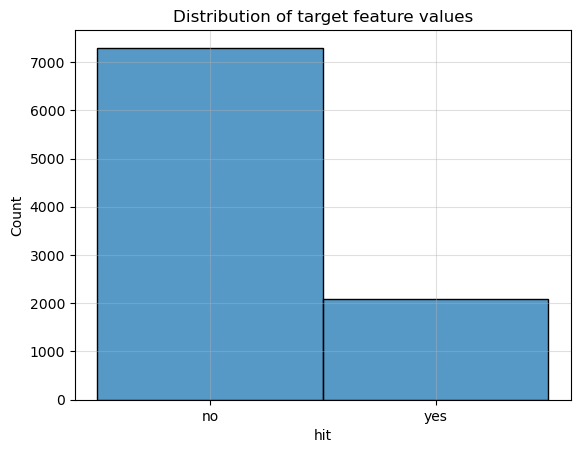

In [52]:
# Visualize distribution of target feature values using the Seaborn library
sns.histplot(y_raw).set_title('Distribution of target feature values')

# Display grid and reduce alpha (increase transparency)
plt.grid(alpha=0.4)

As it can be observed on the previous barchart, the current dataset is still imbalanced enough for our classifiers to produce poor performance results during the modeling phase. To mitigate this issue, we're going to use Synthetic Minority Over-sampling Technique. The implementation of this technique in this project closely follows the approach described on the article https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ by Jason Bownlee.  

### Data Balancing via SMOTE

We'll being by importing the [imbalanced-learn Python library](https://github.com/scikit-learn-contrib/imbalanced-learn), which can be installed via pip as follows:

<code>sudo pip install imbalanced-learn</code>

In [53]:
# Import the "imbalanced-learn" Python library and related classes
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as SmotePipeline


Next, we'll create a custom function named "smote_balance_dataset" that will allow us to apply the SMOTE technique to our imbalance dataset:

In [54]:
# Create custom function to balance dataset using the SMOTE technique 
def smote_balance_dataset(X_imbalanced, y_imbalanced, over_sampling_strategy = 0.5, under_sample_strategy = 0.5):
    # Set the SMOTE oversampling strategy
    over = SMOTE(sampling_strategy=over_sampling_strategy)

    # Set the SMOTE undersampling strategy
    under = RandomUnderSampler(sampling_strategy=under_sample_strategy)

    # Set pipeline steps
    steps = [('o', over), ('u', under)]

    # Create SMOTE pipeline
    smote_pipeline = SmotePipeline(steps=steps)

    # Return X, y variables with SMOTE sampled data  
    return smote_pipeline.fit_resample(X_imbalanced, y_imbalanced)

The following code sets the variables X and y with the balanced data by using the custom function:

In [55]:
# Set X and y with the balanced data using the SMOTE custom function 
X, y = smote_balance_dataset(X_raw, y_raw)

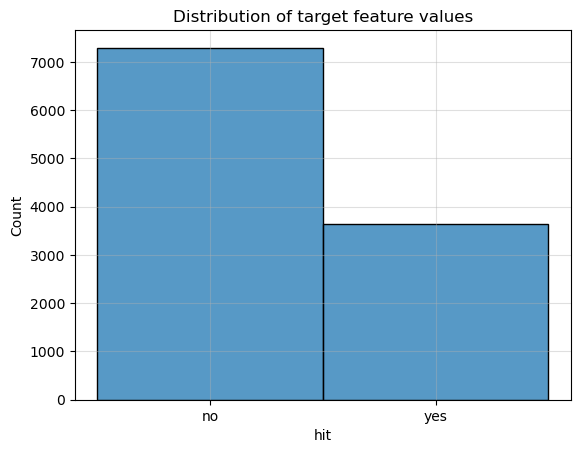

In [56]:
# Visualize distribution of target feature values using the Seaborn library
sns.histplot(y).set_title('Distribution of target feature values')

# Display grid and reduce alpha (increase transparency)
plt.grid(alpha=0.4)

As it can be seen on the previous visualization, the SMOTE technique produced a dataset where the the "yes" class is around 50% of the "no" class. Therefore, wer'e ready to continue with the modeling process. 

### Train / Test Split

In [57]:
# Package imports
from sklearn.model_selection import train_test_split

Using the train_test_split model selector, we proceed to create the train and test data. By default, this model splits the data with train_size ratio of **0.25** and shuffles the data **(shuffle=True)**. We set the **random_state=44** to control the randomness of the data and thus generate reproductible oututs:

In [58]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=44)

# Data Modeling - Iteration #1

In [59]:
# Imports
from time import perf_counter_ns
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

To make the modeling process more efficient, we define a custom function named "train_model" that will help us run several modeling iterations using different models and variations, as well as obtaining model performance metrics:   

In [60]:
# Define a function that trains the model and provide performance results
def train_model(model, X_train, y_train, X_test, y_test, display_confusion_matrix = True):
    #Sets timer 
    start_time = perf_counter_ns()
    # Fit model
    model.fit(X_train, y_train)
    # Ends timer
    end_time = perf_counter_ns()
    # Calculates fit process duration
    duration = end_time - start_time
    
    # Generate predictions
    prediction_test = model.predict(X_test)
    
    # Calculate score for train and test data
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Calculates precison and recall
    precision = precision_score(y_test, prediction_test, pos_label='no')
    recall = recall_score(y_test, prediction_test, pos_label='no')
    
    # Display confusion matrix (if required. Dafaults to "True") 
    if(display_confusion_matrix):
        ConfusionMatrixDisplay.from_predictions(y_test, prediction_test)
    
    # Return dictionary with model and results
    return {
        'model' : model, 
        'fit_duration' : duration,
        'train_score' : train_score,
        'test_score' : test_score,
        'precision' : precision,
        'recall' : recall
    }

## Baseline model 1: Dummy Classifier

In [61]:
from sklearn.dummy import DummyClassifier

To create a baseline clasifier, we're going to leverage the DummyClassifier class. As stated by the Sklearn documentation "This classifier serves as a simple baseline to compare against other more complex classifiers".

{'model': DummyClassifier(random_state=42, strategy='stratified'),
 'fit_duration': 3923373,
 'train_score': 0.5501949317738791,
 'test_score': 0.5398391812865497,
 'precision': 0.6557377049180327,
 'recall': 0.6560962274466922}

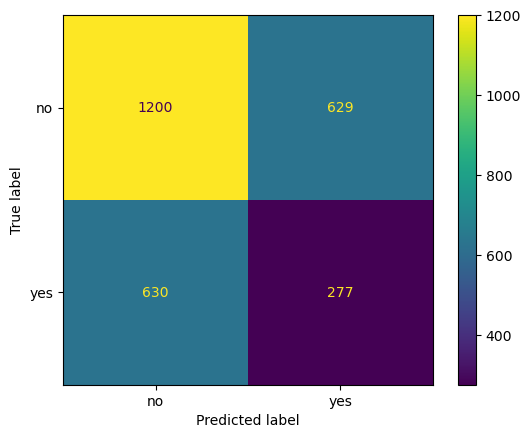

In [62]:
# Create a baseline classifier using the DummyClassifier  
dummy_clf = train_model(DummyClassifier(strategy='stratified', random_state=42), X_train, y_train, X_test, y_test)

# Output dummy classifier
dummy_clf

As it can be seen in the confusion matrix, the baseline classifier performs poorly in predicting true positives and true positive values. 

## Basic Model 1: Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

Next, we will use logistic regression to build a basic model. We're going to use the default settings of the LogisticRegression model, except we'll set the **max_iter=1000** parameter to adjust the minimum number of iterations for the data to converge:

{'model': LogisticRegression(max_iter=1000),
 'fit_duration': 129798128,
 'train_score': 0.9540692007797271,
 'test_score': 0.9437134502923976,
 'precision': 0.9481005885500268,
 'recall': 0.9688354291962821}

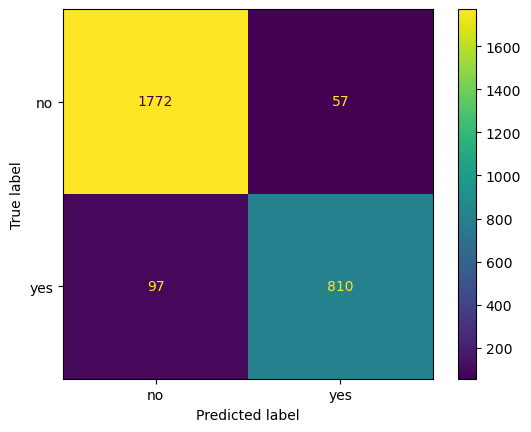

In [64]:
# Train LogisticRegression model by leveraging the train_model custom function 
lrg = train_model(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

# Display model output
lrg

In [65]:
# Print the accuracy of the model on the Train data
print("Accuracy on Train Data ", lrg['train_score'])
# Print the accuracy of the model on the Test data
print("Accuracy on Test Data ", lrg['test_score'])

Accuracy on Train Data  0.9540692007797271
Accuracy on Test Data  0.9437134502923976


As it can be observed, the preformance of this model, even when trained with its default hyper parameters, performs significantly better than the baseline model.     

## Alternative Models - Iteration #1

<p>Next, we're going to train other data classication models, namely KNN, Decision Tree and SVM, and compare their results to the ones obtained thus far. The observations are presented at the end of the modeling process. </p>

In [66]:
# Package imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Alternate Model #1.1: KNN

{'model': KNeighborsClassifier(),
 'fit_duration': 8409857,
 'train_score': 0.9008284600389863,
 'test_score': 0.8527046783625731,
 'precision': 0.9326456310679612,
 'recall': 0.8403499179879715}

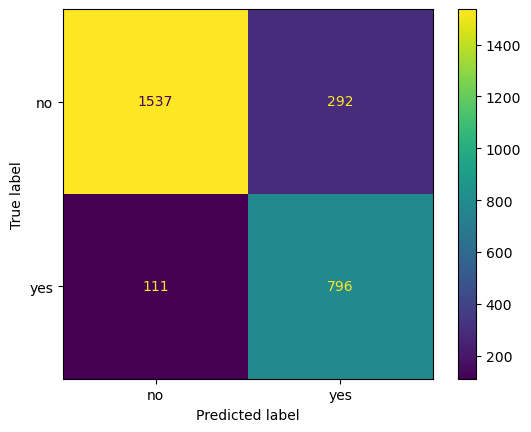

In [67]:
# Instantiate and train KNN model by leveraging the train_model custom function  
knn = train_model(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

# Display model output
knn

### Alternate Model #1.2: DecisionTree

{'model': DecisionTreeClassifier(),
 'fit_duration': 666532856,
 'train_score': 1.0,
 'test_score': 0.9480994152046783,
 'precision': 0.9591725639629831,
 'recall': 0.9633679606342264}

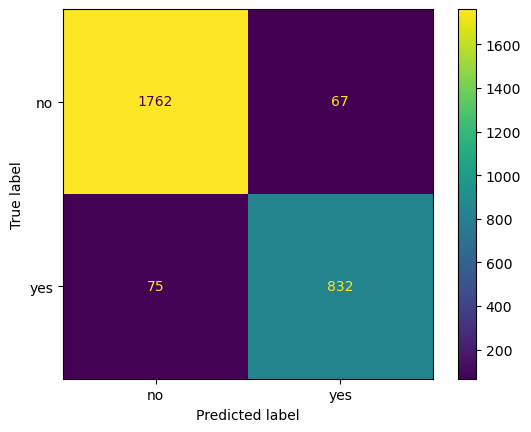

In [68]:
# Instantiate and train Decision Tree model by leveraging the train_model custom function  
dtree = train_model(
    DecisionTreeClassifier(), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

# Display model output
dtree

In [69]:
# Print model parameters
dtree['model'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Alternate Model #1.3: SVM

{'model': SVC(),
 'fit_duration': 1358351487,
 'train_score': 0.9555311890838206,
 'test_score': 0.9385964912280702,
 'precision': 0.9341348667015159,
 'recall': 0.9770366320393657}

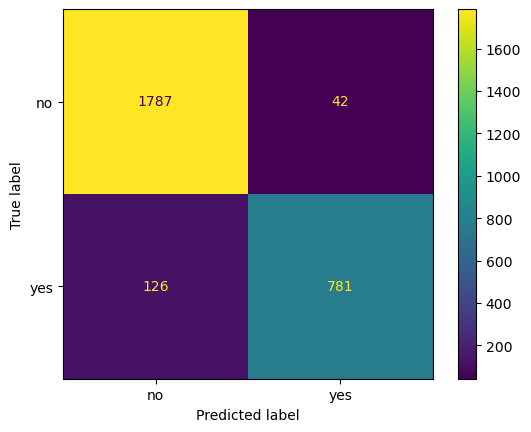

In [70]:
# Instantiate and train SVC model by leveraging the train_model custom function  
svm = train_model(SVC(), X_train, y_train, X_test, y_test)

# Display model output
svm

## Modeling Results - Iteration #1

In this section, we present the results from the modeling phase (first iteration):

In [71]:
# Create results array 
results = [
    ['DummyClassifier', dummy_clf['fit_duration'], dummy_clf['train_score'], dummy_clf['test_score'], dummy_clf['precision'], dummy_clf['recall']],
    ['LogisticRegression', lrg['fit_duration'], lrg['train_score'], lrg['test_score'], lrg['precision'], lrg['recall']],
    ['KNN', knn['fit_duration'], knn['train_score'], knn['test_score'], knn['precision'], knn['recall']],
    ['DecisionTree', dtree['fit_duration'], dtree['train_score'], dtree['test_score'], dtree['precision'], dtree['recall']],
    ['SVM', svm['fit_duration'], svm['train_score'], svm['test_score'], svm['precision'], svm['recall']],
]

In [72]:
# Create Pandas dataframe to summary the resuuls obtained during the modeling process  
results_df = pd.DataFrame(results, columns=['Model', 'Train Time (ns)', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall'])

The results are presented in the following visualizations:

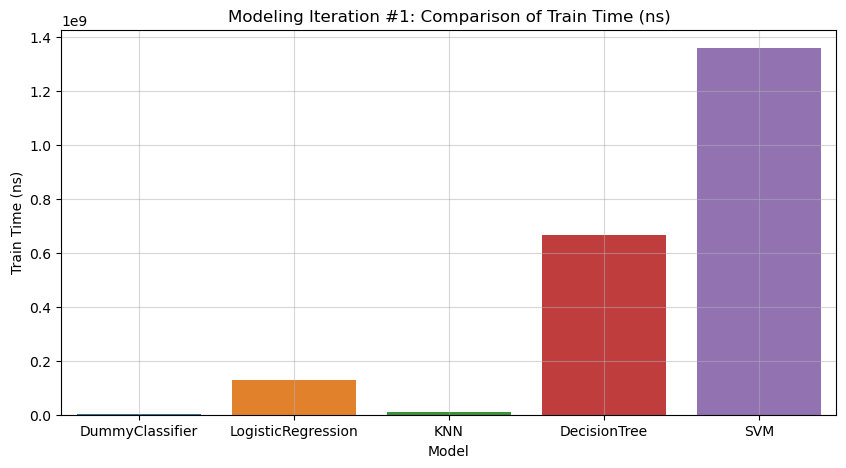

In [73]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Train Time (ns)').set_title('Modeling Iteration #1: Comparison of Train Time (ns)')
# Display grid and set transparency
plt.grid(alpha=0.5)

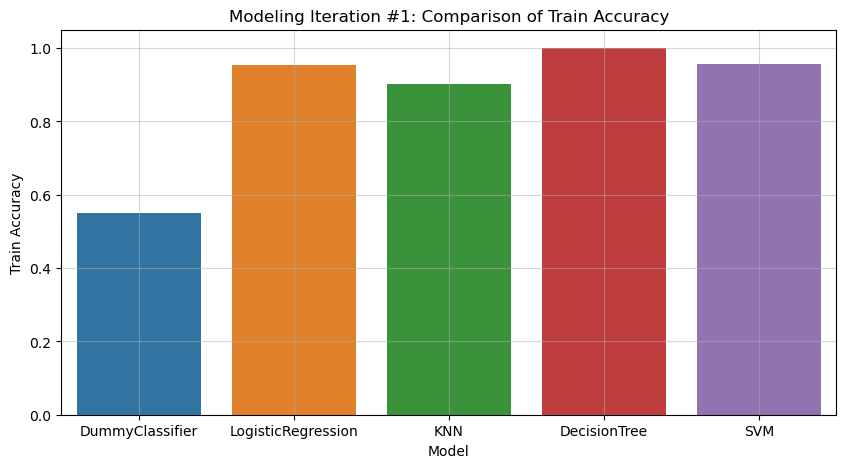

In [74]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Train Accuracy').set_title('Modeling Iteration #1: Comparison of Train Accuracy')
# Display grid and set transparency
plt.grid(alpha=0.5)

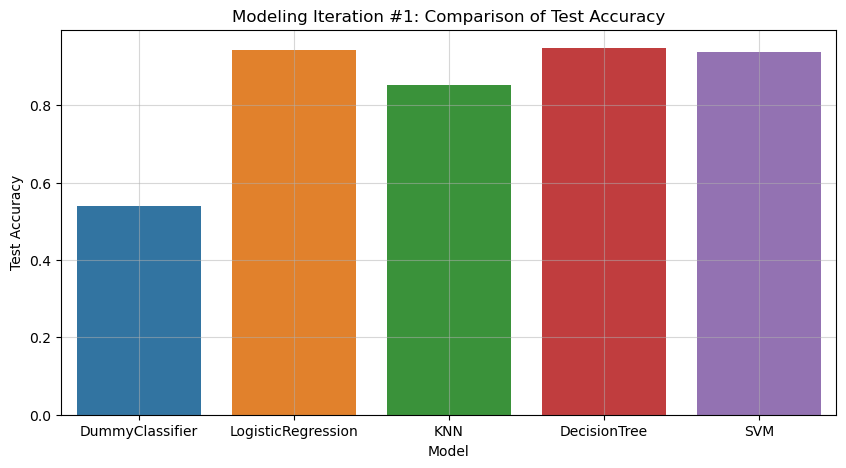

In [75]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Test Accuracy').set_title('Modeling Iteration #1: Comparison of Test Accuracy')
# Display grid and set transparency
plt.grid(alpha=0.5)

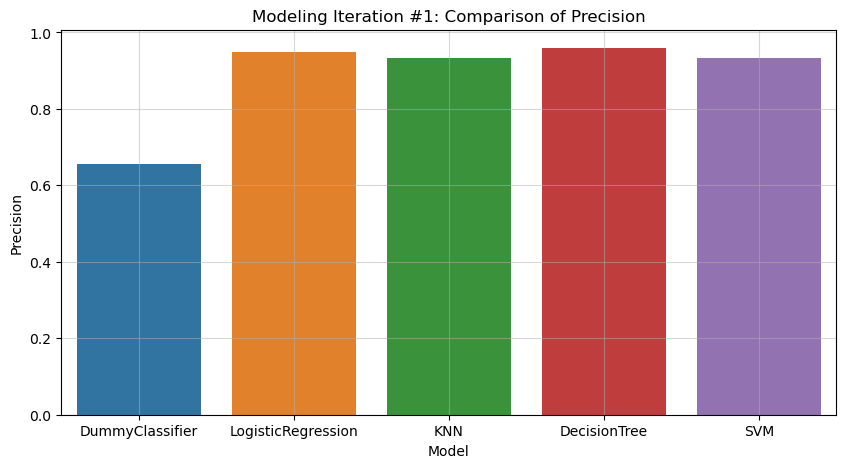

In [76]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Precision').set_title('Modeling Iteration #1: Comparison of Precision')
# Display grid and set transparency
plt.grid(alpha=0.5)

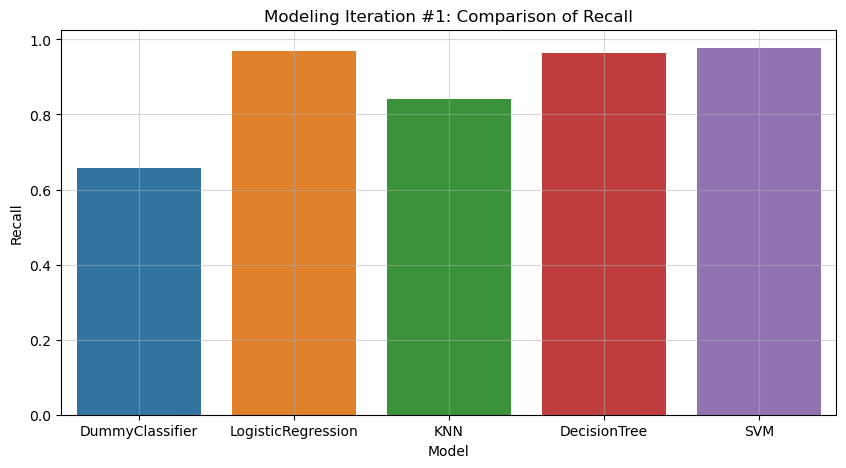

In [77]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Recall').set_title('Modeling Iteration #1: Comparison of Recall')
# Display grid and set transparency
plt.grid(alpha=0.5)

In [78]:
# Output results 
results_df

,Model,Train Time (ns),Train Accuracy,Test Accuracy,Precision,Recall
0,DummyClassifier,3923373,0.550195,0.539839,0.655738,0.656096
1,LogisticRegression,129798128,0.954069,0.943713,0.948101,0.968835
2,KNN,8409857,0.900828,0.852705,0.932646,0.840350
3,DecisionTree,666532856,1.000000,0.948099,0.959173,0.963368
4,SVM,1358351487,0.955531,0.938596,0.934135,0.977037


<h4>Observations - Iteration #1:</h4>
<ul>
    <li>
        As per training time, aside from the Dummy Classifier (baseline model), KNN was the best performing model, followed by the logistic regression model.
    </li>
    <li>
        As per training accuracy, the best results were produced by the SVM classifier, followed by the Logistic Regresison classifier. Notice that the Decision tree model resulted in a perfect score for train accuracy, which is an indication of overfitting. 
    </li>    
    <li>
        As it relates to test accuracy, the best results were produced by the SVM classier, folllowed by the Logistic Regression classifier.  
    </li>
    <li>
        When it comes to precision, the best performing model was the SVM classifier, followed by the Decision Tree classifier. Notice that the KNN model obtained a perfect score in precision, which is an indication of overfitting.
    </li>
    <li>
        In regards to recall, both the SVM and Decision tree classifiers obtained the same top score. However, we suspect the DecisionTree is overfitted. 
    </li>
</ul>


## Determining the most important features - Iteration #1

In [83]:
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

Now, we instantiate the feature selector to determine the most impostant features using a logistic regression model:

In [84]:
# Instantiate feature selector
extractor = SelectFromModel(lrg['model'])

In [85]:
# Train LogisticRegression pipe by leveraging the "train_pipe" custom function
lgr_pipe = Pipeline([
        ('selector', extractor),
        ('lgr', LogisticRegression())        
    ])

# Genarate model output
lgr_pipe.fit(X, y)

Pipeline(steps=[('selector',
                 SelectFromModel(estimator=LogisticRegression(max_iter=1000))),
                ('lgr', LogisticRegression())])

In [86]:
# Get feature names
feature_names = transformer.get_feature_names_out() 

# Instantiate variable with the selected features
selected_features =feature_names[ [int(i[1:]) for i in lgr_pipe.named_steps['selector'].get_feature_names_out()]]

# Remove the "__" word separators added by the selector 
clean_names = [i.split('__')[-1] for i in selected_features]

# Create a dataframe with the coefficients
coef_df = pd.DataFrame({
    'feature' : clean_names,
    'coefs' : abs(lgr_pipe.named_steps['lgr'].coef_[0])
})

# Sort the order of the dataframe by the coeficient values in descending order
coef_df = coef_df.sort_values(by ='coefs', ascending = False)

# Get the latest 5 rows of the dataframe
coef_df.head(20)

,feature,coefs
277,genre_0_pop,6.913154
201,genre_0_k-pop,5.379334
18,genre_0_art pop,5.343963
296,genre_0_reggaeton,4.902269
13,genre_0_alternative rock,4.559245
73,genre_0_canadian hip hop,4.545298
290,genre_0_r&b,4.491182
62,genre_0_british soul,4.345347
71,genre_0_canadian contemporary r&b,4.331412
11,genre_0_alternative metal,4.293994


We'll create a bar chart to better visualize the top 10 features:

Text(0, 0.5, 'Feature')

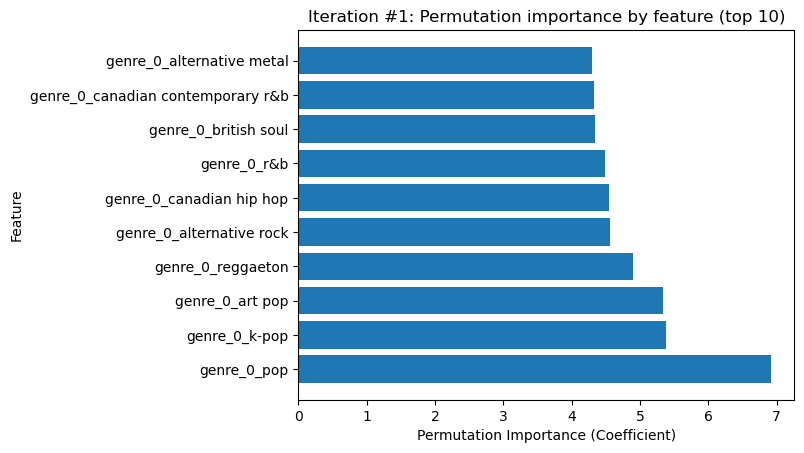

In [87]:
# Genarate horizontal barchart to visualize results
plt.barh(y=coef_df['feature'].head(10), width=coef_df['coefs'].head(10))
plt.title("Iteration #1: Permutation importance by feature (top 10)")
plt.xlabel("Permutation Importance (Coefficient)")
plt.ylabel("Feature")

It is clear from the visualization that "genre" seems to be the most determining factor for a song to be a hit. In fact, this is a good point in the analysis to visualize the distribution of genres on the hit songs: 

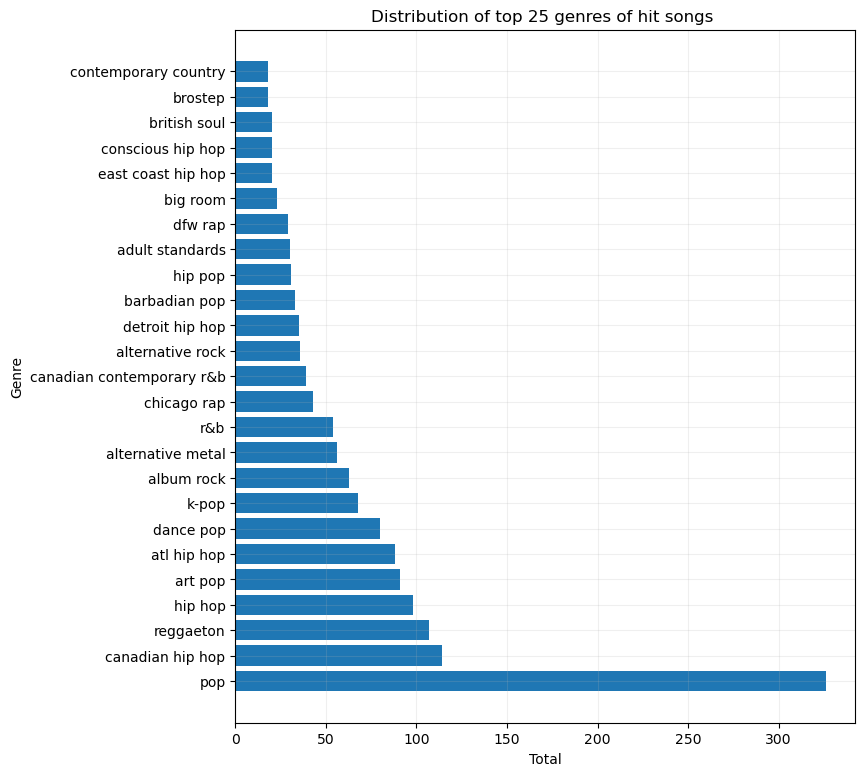

In [88]:
# Genarate horizontal barchart to visualize results
plt.figure(figsize=(8,9))
plt.barh(width=df_clean_final.query('hit == "yes"')['genre_0'].value_counts().head(25), y=df_clean_final.query('hit == "yes"')['genre_0'].value_counts().head(25).index)
plt.title("Distribution of top 25 genres of hit songs ")
plt.ylabel("Genre")
plt.xlabel("Total")
plt.grid(alpha=0.2)

The previous visualization allows us to see that not only "pop" is the most prevalent genre among the hit songs, but also its variants such as "art pop", "dance pop", "k-pop", "barbadian pop", "etc.,  are also represented in the distribution. 


Although this is an important discovery, it seems prudent to explore what other chracteristics aside from genre make a song popular. Therefore, on the following section, we're going to run another modeling iteration but this time excluding the genre feature.


# Data Modeling - Iteration #2 

Based on the discovery from the first modeling iteration, we want to explore what other features aside from genre, are common among hit songs. Therefore, on this second modeling iteration we're going to exclude the "genre" feature. Since the approach is similar to the one in iteration #1, some of the explanations have been intentionally left out.  

In [89]:
# Instantate column transformer to encode and scale the data subset  
transformer_no_genre = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['explicit']),
                                     remainder = StandardScaler())


In [90]:
# Set X dataframe
X_raw_no_genre = transformer_no_genre.fit_transform(df_clean_final.drop(['hit', 'genre_0'], axis=1))

In [91]:
# Set "y" (target) series
y_raw_no_genre = df_clean_final['hit']

In [92]:
# Set X and y with the balanced data using the SMOTE custom function 
X_no_genre, y_no_genre = smote_balance_dataset(X_raw_no_genre, y_raw_no_genre)

In [93]:
# Create train/test split
X_no_genre_train, X_no_genre_test, y_no_genre_train, y_no_genre_test = train_test_split(X_no_genre, y_no_genre, random_state=44)

## Baseline model 2: Dummy Classifier

{'model': DummyClassifier(random_state=42, strategy='stratified'),
 'fit_duration': 3794415,
 'train_score': 0.5501949317738791,
 'test_score': 0.5398391812865497,
 'precision': 0.6557377049180327,
 'recall': 0.6560962274466922}

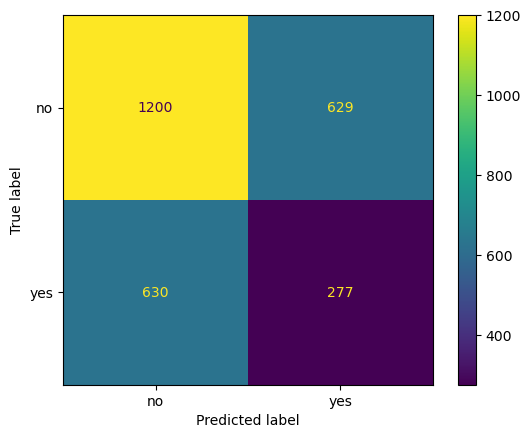

In [94]:
# Create a baseline classifier using the DummyClassifier  
dummy_clf_no_genre = train_model(
    DummyClassifier(strategy='stratified', random_state=42), 
    X_no_genre_train, 
    y_no_genre_train, 
    X_no_genre_test, 
    y_no_genre_test
)

# Output dummy classifier
dummy_clf_no_genre

## Basic Model 2: Logistic Regression

{'model': LogisticRegression(max_iter=1000),
 'fit_duration': 19757792,
 'train_score': 0.7402534113060428,
 'test_score': 0.7536549707602339,
 'precision': 0.7657616198803497,
 'recall': 0.9097867687260798}

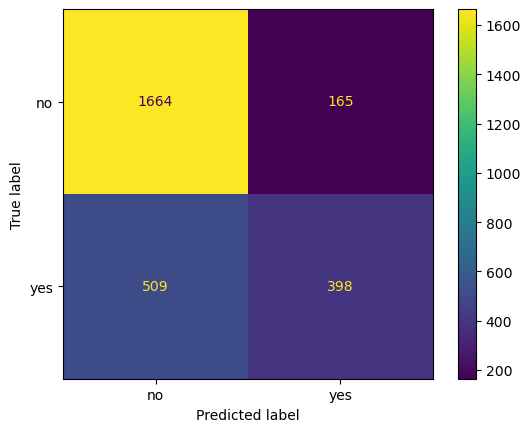

In [95]:
# Train LogisticRegression model by leveraging the train_model custom function 
lrg_no_genre = train_model(
    LogisticRegression(max_iter=1000), 
    X_no_genre_train, 
    y_no_genre_train, 
    X_no_genre_test, 
    y_no_genre_test
)

# Display model output
lrg_no_genre

## Alternative Models - Iteration #2
<p>Next, we're going to train other data classication models, namely KNN, Decision Tree and SVM, and compare their results to the ones obtained thus far. The observations are presented at the end of the modeling process. </p>

### Alternative Model #2.1: KNN

{'model': KNeighborsClassifier(),
 'fit_duration': 11906903,
 'train_score': 0.8586744639376218,
 'test_score': 0.7774122807017544,
 'precision': 0.8600944510035419,
 'recall': 0.7966101694915254}

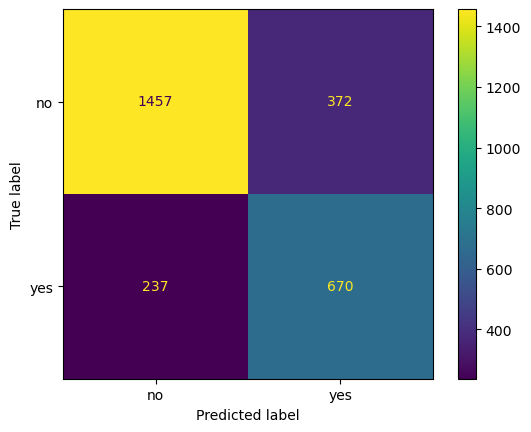

In [96]:
# Instantiate and train KNN model by leveraging the train_model custom function  
knn_no_genre = train_model(
    KNeighborsClassifier(), 
    X_no_genre_train, 
    y_no_genre_train, 
    X_no_genre_test, 
    y_no_genre_test
)

# Display model output
knn_no_genre

### Alternative Model #2.2: Decision Tree

{'model': DecisionTreeClassifier(),
 'fit_duration': 116026195,
 'train_score': 1.0,
 'test_score': 0.7726608187134503,
 'precision': 0.84,
 'recall': 0.815199562602515}

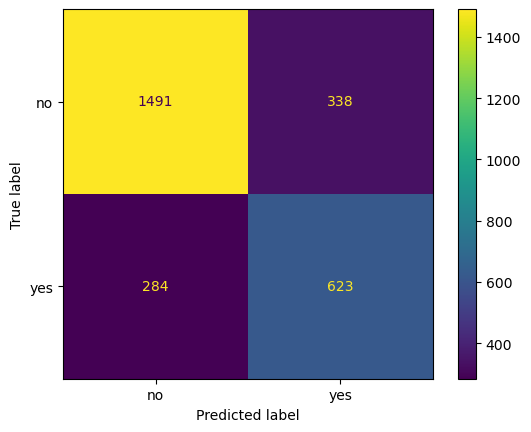

In [97]:
# Instantiate and train DecesionTree model by leveraging the train_model custom function  
dtree_no_genre = train_model(
    DecisionTreeClassifier(), 
    X_no_genre_train, 
    y_no_genre_train, 
    X_no_genre_test, 
    y_no_genre_test
)

# Display model output
dtree_no_genre

### Alternative Model #2.3: SVM

{'model': SVC(),
 'fit_duration': 2048578991,
 'train_score': 0.7966617933723197,
 'test_score': 0.7894736842105263,
 'precision': 0.8090774543660583,
 'recall': 0.896664844177146}

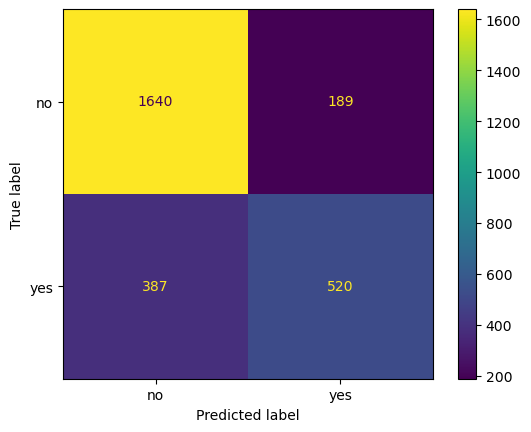

In [98]:
# Instantiate and train SVC model by leveraging the train_model custom function  
svm_no_genre = train_model(
    SVC(), 
    X_no_genre_train, 
    y_no_genre_train, 
    X_no_genre_test, 
    y_no_genre_test
)

# Display model output
svm_no_genre

## Modeling Results - Iteration #2

In [99]:
# Create results array 
results_no_genre = [
    ['DummyClassifier', dummy_clf_no_genre['fit_duration'], dummy_clf_no_genre['train_score'], dummy_clf_no_genre['test_score'], dummy_clf_no_genre['precision'], dummy_clf_no_genre['recall']],
    ['LogisticRegression', lrg_no_genre['fit_duration'], lrg_no_genre['train_score'], lrg_no_genre['test_score'], lrg_no_genre['precision'], lrg_no_genre['recall']],
    ['KNN', knn_no_genre['fit_duration'], knn_no_genre['train_score'], knn_no_genre['test_score'], knn_no_genre['precision'], knn_no_genre['recall']],
    ['DecisionTree', dtree_no_genre['fit_duration'], dtree_no_genre['train_score'], dtree_no_genre['test_score'], dtree_no_genre['precision'], dtree_no_genre['recall']],
    ['SVM', svm_no_genre['fit_duration'], svm_no_genre['train_score'], svm_no_genre['test_score'], svm_no_genre['precision'], svm_no_genre['recall']],
]

In [100]:
# Create Pandas dataframe to summary the results obtained during the second modeling iteration  
results_no_genre_df = pd.DataFrame(results_no_genre, columns=['Model', 'Train Time (ns)', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall'])

The results are presented in the following visualizations:

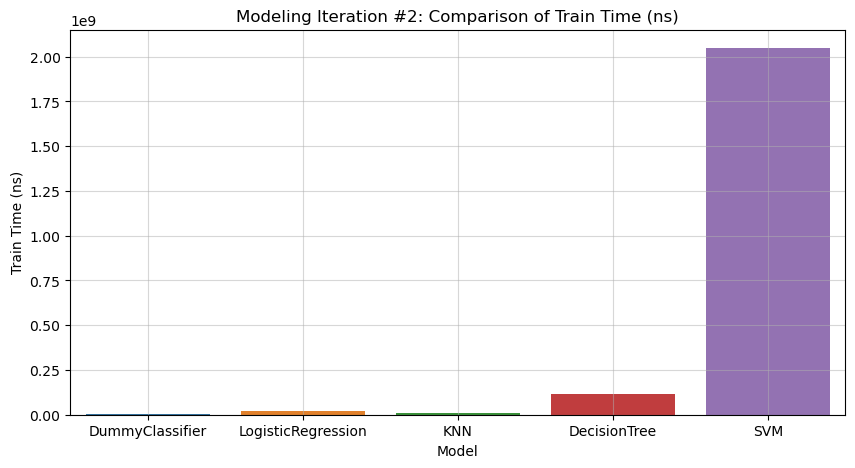

In [101]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_no_genre_df, x='Model', y='Train Time (ns)').set_title('Modeling Iteration #2: Comparison of Train Time (ns)')
# Display grid and set transparency
plt.grid(alpha=0.5)

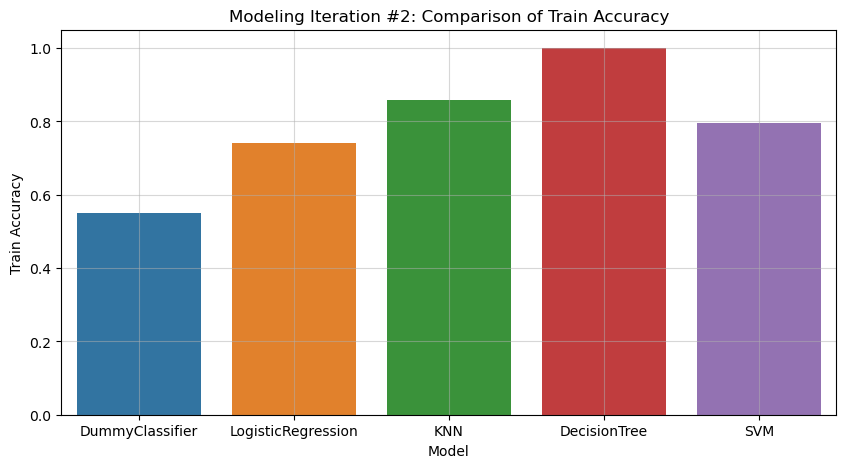

In [102]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_no_genre_df, x='Model', y='Train Accuracy').set_title('Modeling Iteration #2: Comparison of Train Accuracy')
# Display grid and set transparency
plt.grid(alpha=0.5)

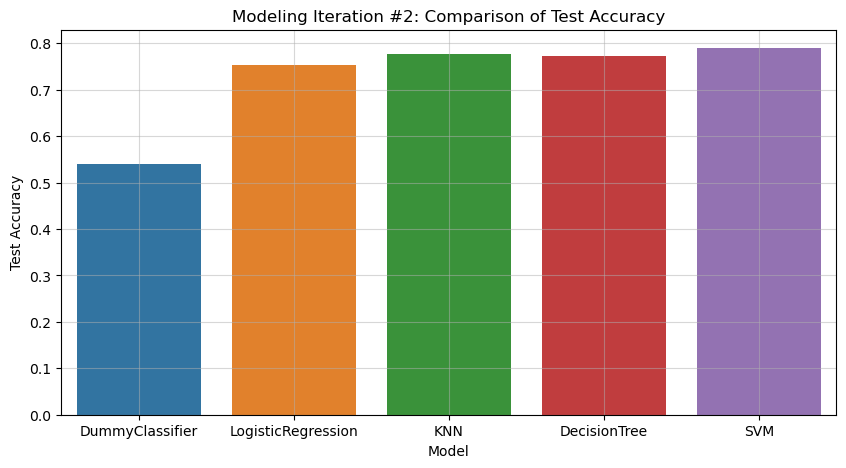

In [103]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_no_genre_df, x='Model', y='Test Accuracy').set_title('Modeling Iteration #2: Comparison of Test Accuracy')
# Display grid and set transparency
plt.grid(alpha=0.5)

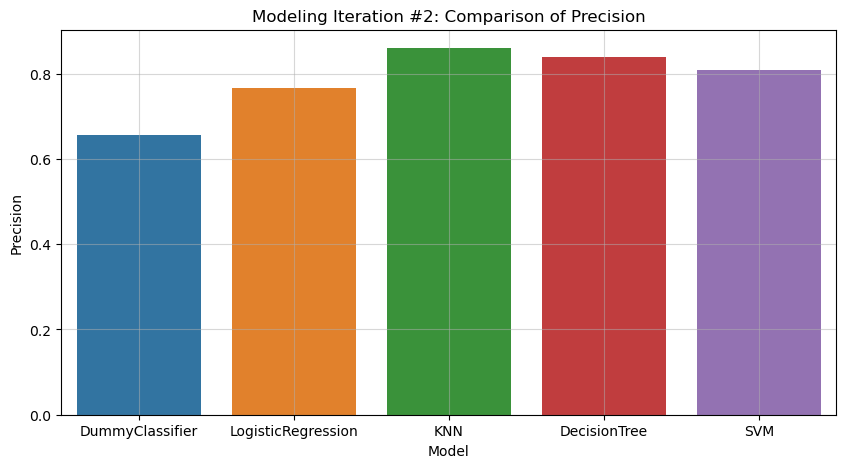

In [104]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_no_genre_df, x='Model', y='Precision').set_title('Modeling Iteration #2: Comparison of Precision')
# Display grid and set transparency
plt.grid(alpha=0.5)

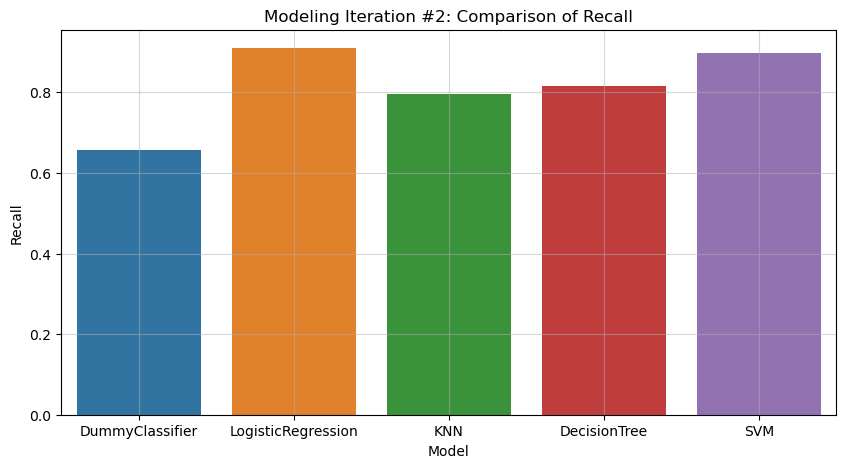

In [105]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_no_genre_df, x='Model', y='Recall').set_title('Modeling Iteration #2: Comparison of Recall')
# Display grid and set transparency
plt.grid(alpha=0.5)

In [106]:
# Output dataframe 
results_no_genre_df

,Model,Train Time (ns),Train Accuracy,Test Accuracy,Precision,Recall
0,DummyClassifier,3794415,0.550195,0.539839,0.655738,0.656096
1,LogisticRegression,19757792,0.740253,0.753655,0.765762,0.909787
2,KNN,11906903,0.858674,0.777412,0.860094,0.796610
3,DecisionTree,116026195,1.000000,0.772661,0.840000,0.815200
4,SVM,2048578991,0.796662,0.789474,0.809077,0.896665


<h4>Observations - Iteration #2:</h4>
<ul>
    <li>As per training time, aside from the Dummy Classifier (baseline model), KNN was the best performing model, followed by the logistic regression model.</li>
    <li>As per training accuracy, the best results were produced by the KNN classifier, followed by the SVM classifier. Notice that the Decision tree model resulted in a perfect score for train accuracy, which is an indication of overfitting.</li>
    <li>As it relates to test accuracy, the best results were produced by the SVM classier, folllowed by the KNN classifier.</li>
    <li>When it comes to precision, the best performing model was the KNN classifier, followed by the Decision Tree classifier.</li>
</ul>

As an overall observation, all models obtained a lower score across all metrics when compared to the first iteration (where genre was included). 

## Determining the most important features - Iteration #2

Now, we instantiate the feature selector to determine the most impostant features for the second iteration using a logistic regression model in a pipeline:

In [107]:
# Instantiate feature selector
extractor_no_genre = SelectFromModel(lrg_no_genre['model'])

In [108]:
# Train LogisticRegression pipe by leveraging the "train_pipe" custom function
lgr_no_genre_pipe = Pipeline([
        ('selector', extractor_no_genre),
        ('lgr', LogisticRegression())        
    ])

# Genarate model output
lgr_no_genre_pipe.fit(X_no_genre, y_no_genre)

Pipeline(steps=[('selector',
                 SelectFromModel(estimator=LogisticRegression(max_iter=1000))),
                ('lgr', LogisticRegression())])

In [109]:
# Get feature names
feature_names_no_genre = transformer_no_genre.get_feature_names_out() 

# Instantiate variable with the selected features
selected_features_no_genre =feature_names_no_genre[ [int(i[1:]) for i in lgr_no_genre_pipe.named_steps['selector'].get_feature_names_out()]]

# Remove the "__" word separators added by the selector 
clean_names_no_genre = [i.split('__')[-1] for i in selected_features_no_genre]

# Create a dataframe with the coefficients
coef_no_genre_df = pd.DataFrame({
    'feature' : clean_names_no_genre,
    'coefs' : abs(lgr_no_genre_pipe.named_steps['lgr'].coef_[0])
})

# Sort the order of the dataframe by the coeficient values in descending order
coef_no_genre_df = coef_no_genre_df.sort_values(by ='coefs', ascending = False)

# Get the latest 5 rows of the dataframe
coef_no_genre_df.head(20)

,feature,coefs
0,explicit_True,2.201754
2,energy,0.594449
3,speechiness,0.406184
1,danceability,0.339574


Text(0, 0.5, 'Feature')

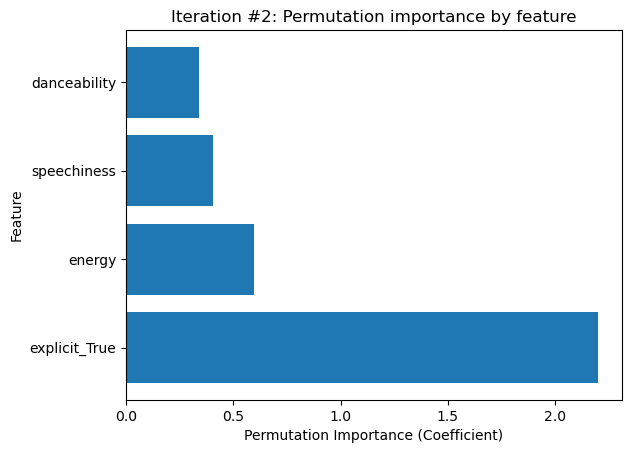

In [110]:
# Genarate horizontal barchart to visualize results
plt.barh(y=coef_no_genre_df['feature'].head(10), width=coef_no_genre_df['coefs'].head(10))
plt.title("Iteration #2: Permutation importance by feature")
plt.xlabel("Permutation Importance (Coefficient)")
plt.ylabel("Feature")

As we can see from the results from this second iteration, the most important features seem to be "explicit", "energy" and "danceability".

Having determined on the first iteration that the "pop" genre seems to be the most prevalent among the most popular songs, it seems reasonable to perform a third modeling iteration just focusing on the tracks that belong to the pop genre (and its variants). 

# Data Modeling - Iteration #3

For the third iteration, we're going to follow the same approach as in iterations #1 are #2, except this time we will focus on the "pop" genre and its variants.

In [111]:
# Create a new dataframe containing only pop (and its variants) songs 
df_pop = df_clean[df_clean['genre_0'].str.contains("pop")]

Let's get the count of pop variants: 

In [112]:
# Get total of pop variants
df_pop['genre_0'].value_counts()

dance pop               4496
pop                     2801
k-pop                   2348
classic country pop     1485
art pop                  894
                        ... 
pop electronico            1
classic romanian pop       1
swiss pop                  1
christian pop              1
bodo pop                   1
Name: genre_0, Length: 356, dtype: int64

As it can be seen from the value counts above, there are 356 pop variants represented in the dataset. Let's visualize the top 50 variants:

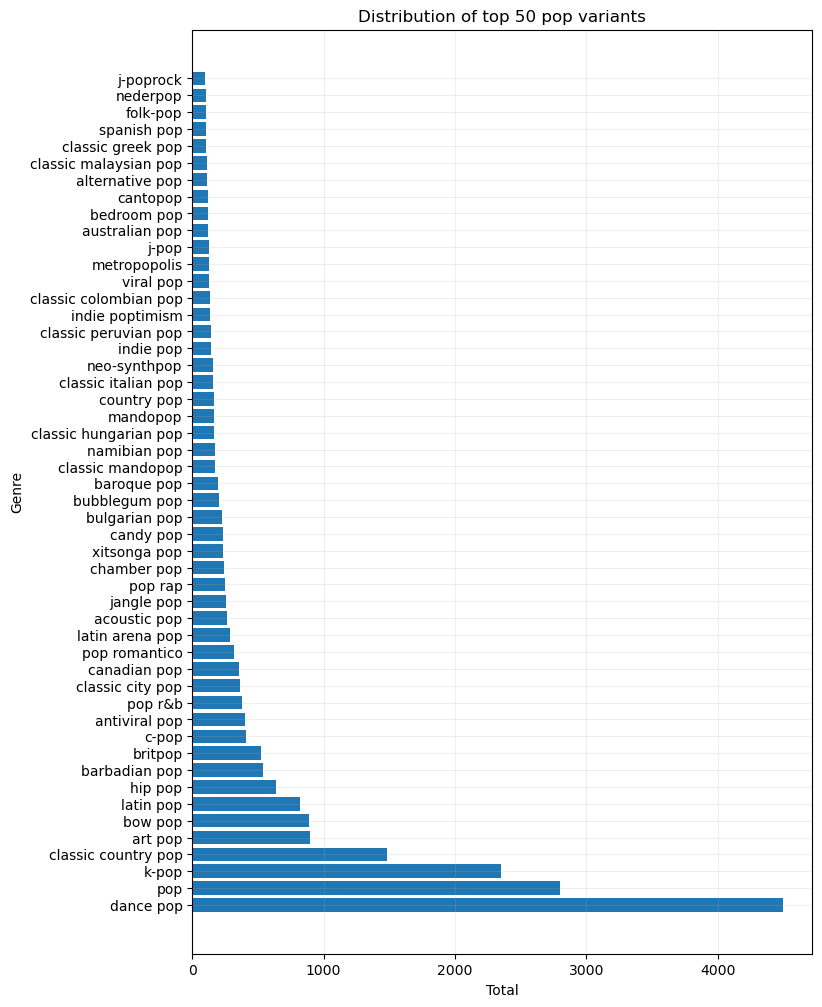

In [113]:
# Genarate horizontal barchart to visualize results
plt.figure(figsize=(8,12))
plt.barh(width=df_pop['genre_0'].value_counts().head(50), y=df_pop['genre_0'].value_counts().head(50).index)
plt.title("Distribution of top 50 pop variants")
plt.ylabel("Genre")
plt.xlabel("Total")
plt.grid(alpha=0.2)

In [114]:
# Display summary stats
df_pop.describe()

,duration_sec,acousticness,danceability,energy,key,liveness,mode,speechiness,tempo,time_signature,valence,track_popularity
count,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000
mean,226.470804,0.310525,0.598896,0.621311,5.339768,0.209388,0.636596,0.084166,121.054413,3.920941,0.508259,24.293861
std,79.530979,0.311973,0.156550,0.228413,3.584747,0.192005,0.480988,0.110966,28.565869,0.381839,0.245846,20.417821
min,4.013000,0.000002,0.000000,0.000098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.706000,0.033475,0.500000,0.456000,2.000000,0.095700,0.000000,0.034300,99.949750,4.000000,0.311000,7.000000
50%,217.000000,0.186000,0.616000,0.654000,5.000000,0.130000,1.000000,0.045700,120.989500,4.000000,0.501000,20.000000
75%,253.456250,0.561000,0.712000,0.813000,9.000000,0.264000,1.000000,0.079000,136.782500,4.000000,0.705000,38.000000
max,2856.466000,0.996000,0.982000,1.000000,11.000000,1.000000,1.000000,0.962000,228.008000,5.000000,0.998000,99.000000


<b>Observations</b>
- From the stats summary we can observe that the total entries on the pop dataset is 20,320. 
- We can also see that the mean of the track popularity on the pop songs is ~24, which represents about 12 times the mean of the track_popularity on our "unpopular songs" dataset from our two previous iterations. 

For the labeling of the target feature "hit", we're going to consider "hits" the the top 1% most popular pop songs: 

In [115]:
# Create dataframe with top 1% most popular pop songs
df_pop_top_1pct= df_pop.sort_values(by='track_popularity', ascending=False).head(round(len(df_pop)*0.01))

In [116]:
# Get stats summary
df_pop_top_1pct.describe()

,duration_sec,acousticness,danceability,energy,key,liveness,mode,speechiness,tempo,time_signature,valence,track_popularity
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,217.199440,0.261289,0.616809,0.612670,4.781570,0.153327,0.682594,0.074362,121.546570,3.924915,0.452231,82.658703
std,49.141628,0.291876,0.147256,0.188201,3.709494,0.113142,0.466263,0.070441,27.494022,0.406910,0.245746,3.649859
min,60.719000,0.000155,0.144000,0.056100,0.000000,0.023200,0.000000,0.025300,56.829000,1.000000,0.037400,78.000000
25%,193.000000,0.037800,0.516000,0.485000,1.000000,0.088100,0.000000,0.035600,100.012000,4.000000,0.239000,80.000000
50%,212.600000,0.125000,0.631000,0.637000,5.000000,0.109000,1.000000,0.046800,119.054000,4.000000,0.418000,82.000000
75%,235.800000,0.401000,0.733000,0.764000,8.000000,0.182000,1.000000,0.080000,139.883000,4.000000,0.665000,85.000000
max,613.026000,0.978000,0.967000,0.931000,11.000000,0.764000,1.000000,0.461000,205.945000,5.000000,0.969000,99.000000


From the stats summary above, we can observe that the mean of the track popularity on the top 100 songs is around "82", which is close to the "87" threshold found for the top 100 most popular tracks during the data exploration phase.

After having found the so many variants of the poo genre, it seems reasonable to explore which of those variants are the most prevanlent within the top 1%. Therefore, let's visualize this data:  

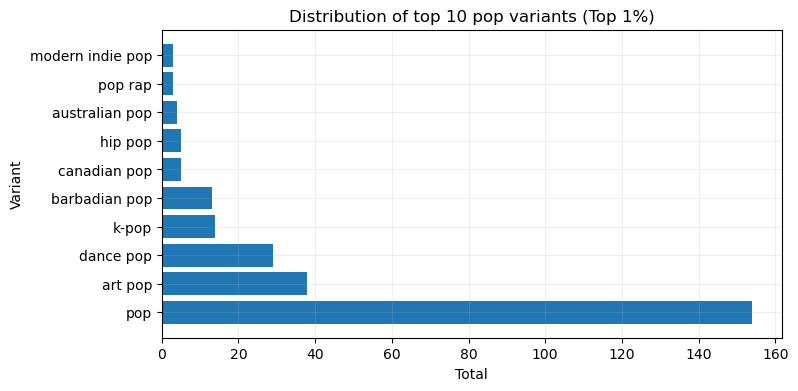

In [117]:
# Genarate horizontal barchart to visualize results
plt.figure(figsize=(8,4))
plt.barh(width=df_pop_top_1pct['genre_0'].value_counts().head(10), y=df_pop_top_1pct['genre_0'].value_counts().head(10).index)
plt.title("Distribution of top 10 pop variants (Top 1%)")
plt.ylabel("Variant")
plt.xlabel("Total")
plt.grid(alpha=0.2)

As it can be observed, the pure "pop" style is the most prevalent, followed by "art pop", "dance pop", "k-pop" and "barbadian pop".

Now, we'll proceed with the labeling of the target variable. For the labeling of the "non" popular (hit = "no") entries, we're going to use the mean of the track_popularity of the pop dataset as the threshold:

In [118]:
# Create subset with tracks of popularity equal or greater than 87
df_pop_unpopular = (df_pop[df_pop['track_popularity'] <= df_pop['track_popularity'].mean()]).copy()
df_pop_unpopular['hit'] = 'no'
df_pop_popular = df_pop_top_1pct
df_pop_popular['hit'] = 'yes'

Now we can concatenate the non-popular and the popular tracks in a single dataset:

In [119]:
# Concatenate least popular pop tracks with most popular pop tracks 
df_pop_final = pd.concat([df_pop_unpopular, df_pop_popular])

Since this dataset contains inly pop tracks, we can remove the "genre_0" feature:

In [120]:
# Remove genre_0 feature (since it's all pop related)
df_pop_final = df_pop_final.drop('genre_0', axis=1)

And we will also remove the "track_popularity" feature since this was converted into a categorical value on the target variable: 

In [121]:
# Drop the "track_popularity" columns
df_pop_final = df_pop_final.drop('track_popularity', axis=1)

In [122]:
df_pop_final

,duration_sec,acousticness,danceability,energy,key,liveness,mode,speechiness,tempo,time_signature,valence,explicit,hit
974,164.257,0.45900,0.576,0.435,6.0,0.3220,1.0,0.1300,75.302,4.0,0.6410,False,no
2137,150.047,0.00184,0.634,0.954,11.0,0.8340,0.0,0.0766,119.983,4.0,0.8070,False,no
2138,207.438,0.00171,0.542,0.842,0.0,0.1610,1.0,0.1680,130.022,4.0,0.3690,False,no
2139,175.203,0.00753,0.704,0.796,0.0,0.3950,1.0,0.1480,127.424,4.0,0.8520,False,no
2140,281.913,0.00352,0.605,0.879,7.0,0.3480,1.0,0.0660,120.004,4.0,0.5690,False,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329095,214.701,0.53200,0.681,0.821,11.0,0.0921,0.0,0.1310,94.074,4.0,0.8130,True,yes
354603,206.070,0.18200,0.756,0.697,8.0,0.3330,1.0,0.0401,94.996,4.0,0.9560,False,yes
367190,228.615,0.39400,0.637,0.799,2.0,0.0921,1.0,0.0338,104.996,4.0,0.5700,False,yes
367000,229.773,0.09330,0.645,0.862,11.0,0.1930,0.0,0.0845,119.947,4.0,0.8030,False,yes


We create a list of the categorical features to be used with the column transformer below:

In [123]:
# Create list of categorical columns
pop_categorical_columns = df_pop_final.drop('hit', axis=1).select_dtypes(include=['object']).columns.tolist()
# Verify
pop_categorical_columns


['explicit']

The following code creates a column transformer that encodes the categorical data and scales the remainder. It also sets the X_pop_raw and y_pop_raw variables:

In [124]:
# Instantate column transformer to encode and scale the data subset  
transformer_pop = make_column_transformer((OneHotEncoder(drop = 'if_binary'), pop_categorical_columns),
                                     remainder = StandardScaler())

# Set X dataframe
X_pop_raw = transformer_pop.fit_transform(df_pop_final.drop(['hit'], axis=1))

# Set "y" (target) series
y_pop_raw = df_pop_final['hit']


Let's visualize the distribution of the target variable:

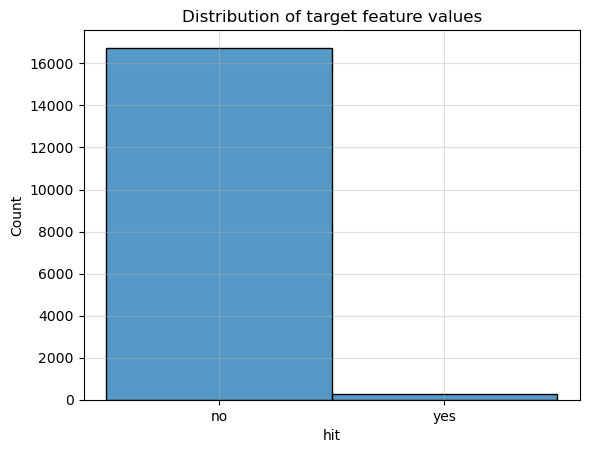

In [125]:
# Visualize distribution of target feature values using the Seaborn library
sns.histplot(y_pop_raw).set_title('Distribution of target feature values')

# Display grid and reduce alpha (increase transparency)
plt.grid(alpha=0.4)

Once again, we encounter a highly imbalanced dataset. As with the previous iterations, we're going to uset SMOTE to create a more balanced distribution of the target variable and avoid overfitting issues during the modeling phase:


In [126]:
# Set X and y with the balanced data using the SMOTE custom function 
X_pop, y_pop = smote_balance_dataset(X_pop_raw, y_pop_raw)

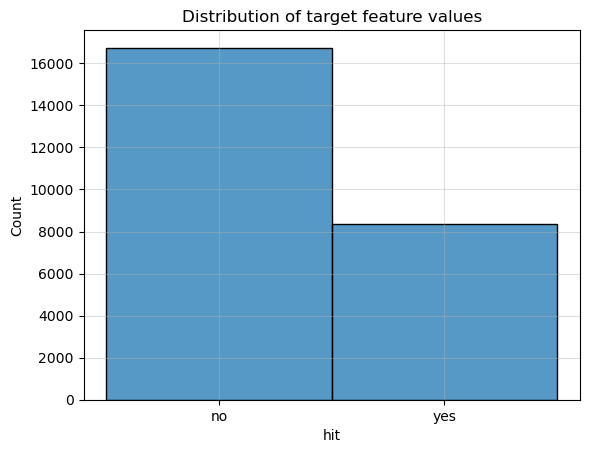

In [127]:
# Visualize distribution of target feature values using the Seaborn library
sns.histplot(y_pop).set_title('Distribution of target feature values')

# Display grid and reduce alpha (increase transparency)
plt.grid(alpha=0.4)

As it can be see from the visualization above, after applying the SMOTE technique, the dataset is now properly balanced and therefore ready for further modeling. It is also important to notice that the size of the dataset is more than twice the one from iterations #1 and #2. We suspect this will be beneficial for the training of the models in this third iteration.  

#### Train / Test split

In [128]:
# Create train/test split
X_pop_train, X_pop_test, y_pop_train, y_pop_test = train_test_split(X_pop, y_pop, random_state=44)

## Baseline Model 3: Dummy Classifier

{'model': DummyClassifier(random_state=42, strategy='stratified'),
 'fit_duration': 8608244,
 'train_score': 0.5625630408239104,
 'test_score': 0.555024685459468,
 'precision': 0.657311320754717,
 'recall': 0.6751453488372093}

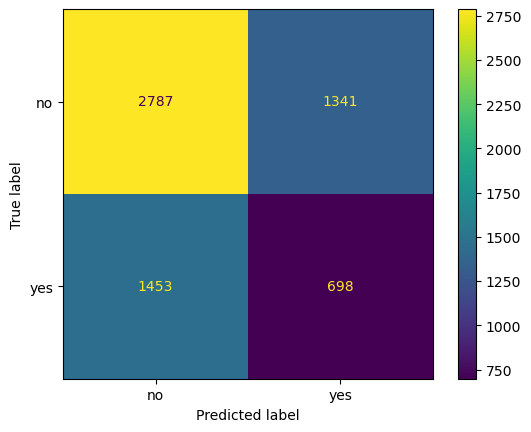

In [129]:
# Create a baseline classifier using the DummyClassifier  
dummy_clf_pop = train_model(
    DummyClassifier(strategy='stratified', random_state=42), 
    X_pop_train, 
    y_pop_train, 
    X_pop_test, 
    y_pop_test
)

# Output dummy classifier
dummy_clf_pop

## Basic Model 3: Logistic Regression

{'model': LogisticRegression(max_iter=1000),
 'fit_duration': 43031755,
 'train_score': 0.6880076445293837,
 'test_score': 0.6712852365026278,
 'precision': 0.7007782101167315,
 'recall': 0.872577519379845}

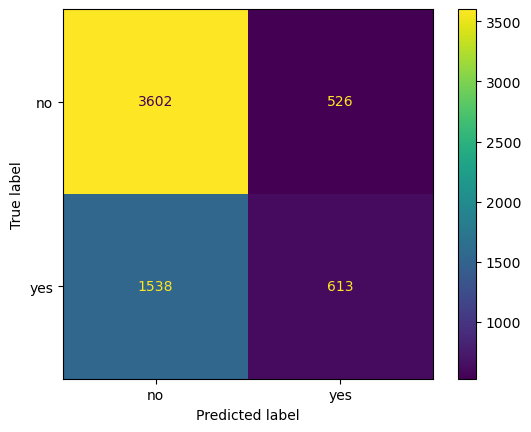

In [130]:
# Train LogisticRegression model by leveraging the train_model custom function 
lrg_pop = train_model(
    LogisticRegression(max_iter=1000), 
    X_pop_train, 
    y_pop_train, 
    X_pop_test, 
    y_pop_test
)

# Display model output
lrg_pop

## Alternative Models - Iteration #3
<p>Next, we're going to train other data classication models, namely KNN, Decision Tree and SVM, and compare their results to the ones obtained thus far. The observations are presented at the end of the modeling process. </p>

### Alternative Model #3.1: KNN 

{'model': KNeighborsClassifier(),
 'fit_duration': 30418200,
 'train_score': 0.9424005945745076,
 'test_score': 0.9230769230769231,
 'precision': 0.9994519046314059,
 'recall': 0.8834786821705426}

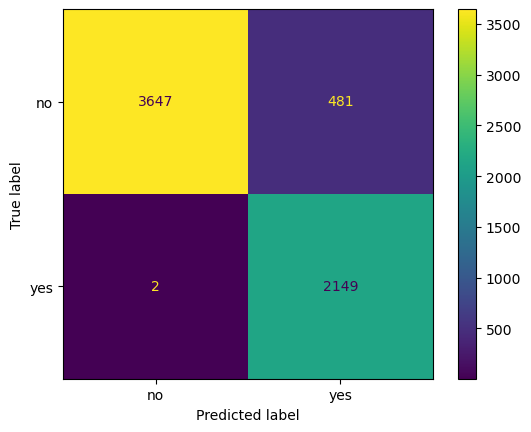

In [131]:
# Instantiate and train KNN model by leveraging the train_model custom function  
knn_pop = train_model(
    KNeighborsClassifier(), 
    X_pop_train, 
    y_pop_train, 
    X_pop_test, 
    y_pop_test
)

# Display model output
knn_pop

### Alternative Model #3.2: Decision Tree

{'model': DecisionTreeClassifier(),
 'fit_duration': 262909814,
 'train_score': 0.9998938259807825,
 'test_score': 0.9235547061634019,
 'precision': 0.9562281140570286,
 'recall': 0.9261143410852714}

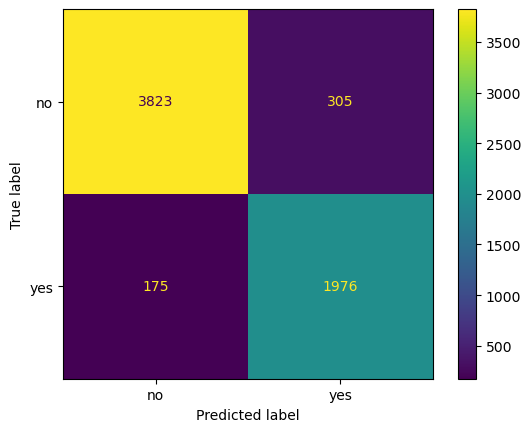

In [132]:
# Instantiate and train Decision Tree model by leveraging the train_model custom function  
dtree_pop = train_model(
    DecisionTreeClassifier(), 
    X_pop_train, 
    y_pop_train, 
    X_pop_test, 
    y_pop_test
)

# Display model output
dtree_pop

### Alternative Model #3.3: SVM

{'model': SVC(),
 'fit_duration': 8873020844,
 'train_score': 0.8819344906301428,
 'test_score': 0.8716356107660456,
 'precision': 0.936186974789916,
 'recall': 0.8636143410852714}

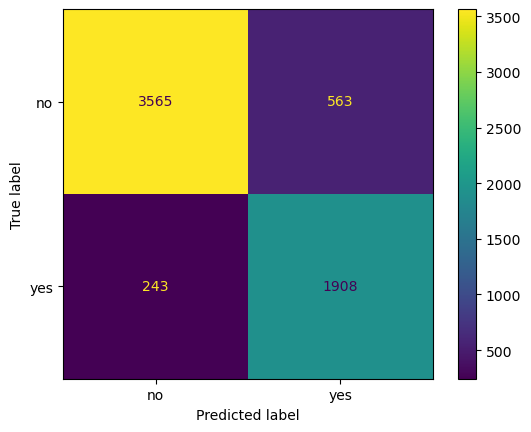

In [133]:
# Instantiate and train SVC model by leveraging the train_model custom function  
svm_pop = train_model(
    SVC(), 
    X_pop_train, 
    y_pop_train, 
    X_pop_test, 
    y_pop_test
)

# Display model output
svm_pop

## Modeling Results - Iteration #3


In [134]:
# Create results array 
results_pop = [
    ['DummyClassifier', dummy_clf_pop['fit_duration'], dummy_clf_pop['train_score'], dummy_clf_pop['test_score'], dummy_clf_pop['precision'], dummy_clf_pop['recall']],
    ['LogisticRegression', lrg_pop['fit_duration'], lrg_pop['train_score'], lrg_pop['test_score'], lrg_pop['precision'], lrg_pop['recall']],
    ['KNN', knn_pop['fit_duration'], knn_pop['train_score'], knn_pop['test_score'], knn_pop['precision'], knn_pop['recall']],
    ['DecisionTree', dtree_pop['fit_duration'], dtree_pop['train_score'], dtree_pop['test_score'], dtree_pop['precision'], dtree_pop['recall']],
    ['SVM', svm_pop['fit_duration'], svm_pop['train_score'], svm_pop['test_score'], svm_pop['precision'], svm_pop['recall']],
]

In [135]:
# Create Pandas dataframe to summary the results obtained during the third modeling iteration  
results_pop_df = pd.DataFrame(results_pop, columns=['Model', 'Train Time (ns)', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall'])

The results are presented in the following visualizations:

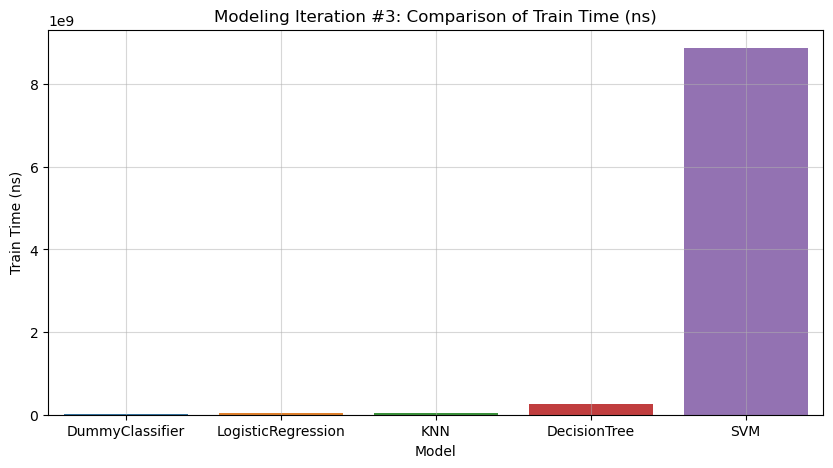

In [136]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_pop_df, x='Model', y='Train Time (ns)').set_title('Modeling Iteration #3: Comparison of Train Time (ns)')
# Display grid and set transparency
plt.grid(alpha=0.5)

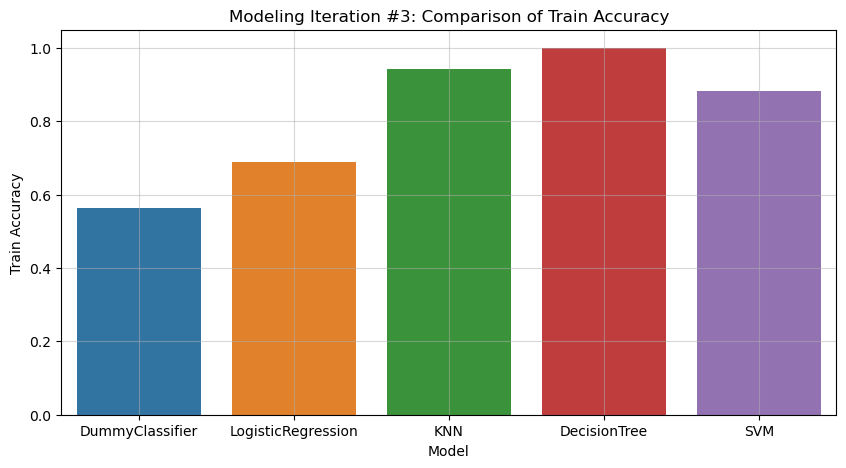

In [137]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_pop_df, x='Model', y='Train Accuracy').set_title('Modeling Iteration #3: Comparison of Train Accuracy')
# Display grid and set transparency
plt.grid(alpha=0.5)

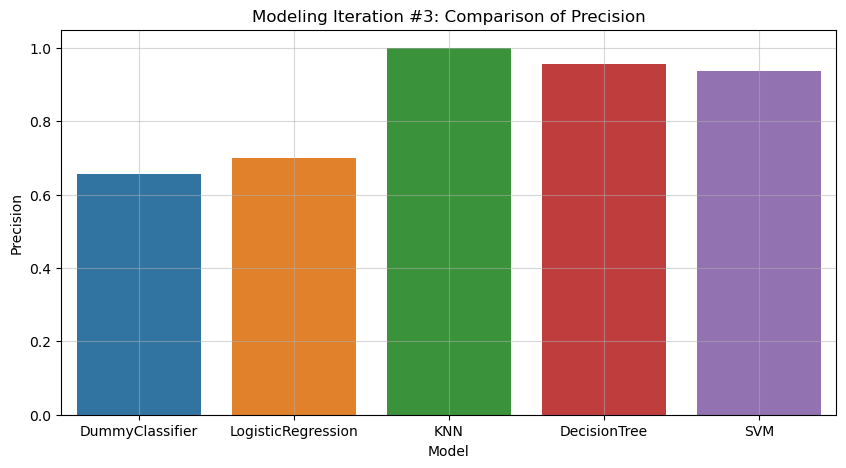

In [138]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_pop_df, x='Model', y='Precision').set_title('Modeling Iteration #3: Comparison of Precision')
# Display grid and set transparency
plt.grid(alpha=0.5)

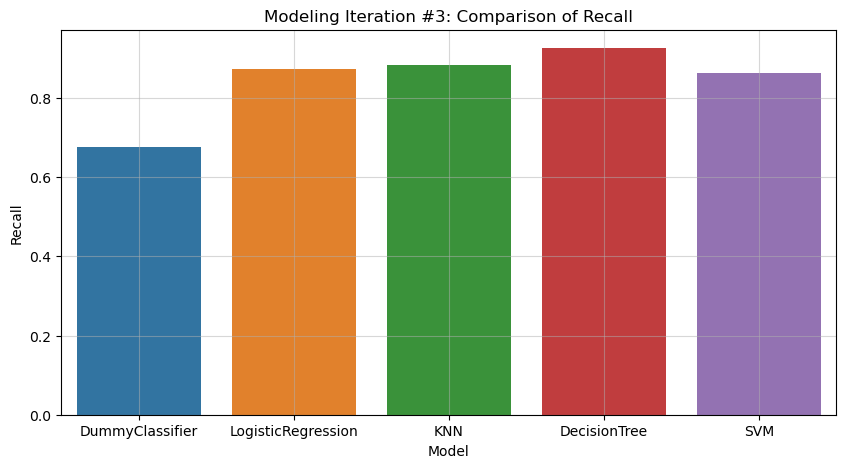

In [139]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_pop_df, x='Model', y='Recall').set_title('Modeling Iteration #3: Comparison of Recall')
# Display grid and set transparency
plt.grid(alpha=0.5)

In [140]:
# Output dataframe
results_pop_df

,Model,Train Time (ns),Train Accuracy,Test Accuracy,Precision,Recall
0,DummyClassifier,8608244,0.562563,0.555025,0.657311,0.675145
1,LogisticRegression,43031755,0.688008,0.671285,0.700778,0.872578
2,KNN,30418200,0.942401,0.923077,0.999452,0.883479
3,DecisionTree,262909814,0.999894,0.923555,0.956228,0.926114
4,SVM,8873020844,0.881934,0.871636,0.936187,0.863614


<h4>Observations - Iteration #3:</h4>
<ul>
    <li>
        As per training time, aside from the Dummy Classifier (baseline model), KNN was the best performing model, followed by the logistic regression model.
    </li>
    <li>
        As per training accuracy, the best results were produced by the KNN classifier, followed by the SVM classifier. Notice that the Decision tree model resulted in a perfect score for train accuracy, which is an indication of overfitting. 
    </li>    
    <li>
        As it relates to test accuracy, the best results were produced by the Decision Tree. However, as indicated aboove, this model seems to be overfited. Therefore, the models that produced the best results for test accuracy were the KNN classifier and the SVM classifier.  
    </li>
    <li>
        When it comes to precision, the best performing model was the KNN classifier, followed by the Decision Tree classifier (overfitted).
    </li>
    <li>
        In regards to recall, aside from the Dummy Classifier and the DecisionTree (overfitted), all models produced similar results.
    </li>
</ul>
<p>As an over comment, on this third iteration (only focused on the pop genre) the we can see a significant boost in performance across the KNN, Decision Tree and SVM classifiers.</p>

## Determining the most important features - Iteration #3

Now, we instantiate the feature selector to determine the most impostant features for the third iteration using a logistic regression model:


In [141]:
# Instantiate feature selector
extractor_pop = SelectFromModel(lrg_pop['model'])    

In [142]:
# Train LogisticRegression pipe by leveraging the "train_pipe" custom function
lgr_pop_pipe = Pipeline([
        ('selector', extractor_pop),
        ('lgr', LogisticRegression(max_iter=150))        
    ])

# Genarate model output
lgr_pop_pipe.fit(X_pop, y_pop)

Pipeline(steps=[('selector',
                 SelectFromModel(estimator=LogisticRegression(max_iter=1000))),
                ('lgr', LogisticRegression(max_iter=150))])

In [143]:
# Get feature names
feature_names_pop = transformer_pop.get_feature_names_out() 

# Instantiate variable with the selected features
selected_features_pop =feature_names_pop[ [int(i[1:]) for i in lgr_pop_pipe.named_steps['selector'].get_feature_names_out()]]

# Remove the "__" word separators added by the selector 
clean_names_pop = [i.split('__')[-1] for i in selected_features_pop]

# Create a dataframe with the coefficients
coef_pop_df = pd.DataFrame({
    'feature' : clean_names_pop,
    'coefs' : abs(lgr_pop_pipe.named_steps['lgr'].coef_[0])
})

# Sort the order of the dataframe by the coeficient values in descending order
coef_pop_df = coef_pop_df.sort_values(by ='coefs', ascending = False)

# Get the latest 5 rows of the dataframe
coef_pop_df.head(20)

,feature,coefs
0,explicit_True,0.834396
3,liveness,0.537983
5,valence,0.513727
2,danceability,0.461477
1,duration_sec,0.392097
4,speechiness,0.367842


Text(0, 0.5, 'Feature')

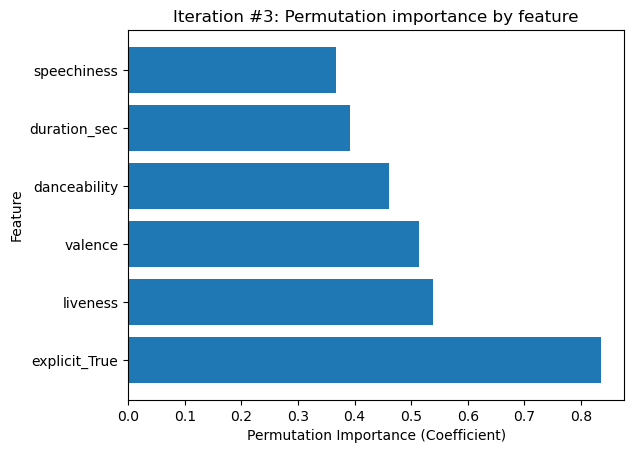

In [144]:
# Genarate horizontal barchart to visualize results
plt.barh(y=coef_pop_df['feature'].head(10), width=coef_pop_df['coefs'].head(10))
plt.title("Iteration #3: Permutation importance by feature")
plt.xlabel("Permutation Importance (Coefficient)")
plt.ylabel("Feature")

We can observe by focusing only on the pop genre, we were able to determine the top 5 most important features that make popi songs be on the top %1 of popularity (in Spotify). It seems reasonable to explore the means of these features from these top %1 songs:

In [145]:
# Get summary stats for the top 1% (most popular) tracks
df_pop_top_1pct[['explicit', 'liveness', 'valence', 'danceability', 'duration_sec', 'speechiness']].describe()

,liveness,valence,danceability,duration_sec,speechiness
count,293.000000,293.000000,293.000000,293.000000,293.000000
mean,0.153327,0.452231,0.616809,217.199440,0.074362
std,0.113142,0.245746,0.147256,49.141628,0.070441
min,0.023200,0.037400,0.144000,60.719000,0.025300
25%,0.088100,0.239000,0.516000,193.000000,0.035600
50%,0.109000,0.418000,0.631000,212.600000,0.046800
75%,0.182000,0.665000,0.733000,235.800000,0.080000
max,0.764000,0.969000,0.967000,613.026000,0.461000


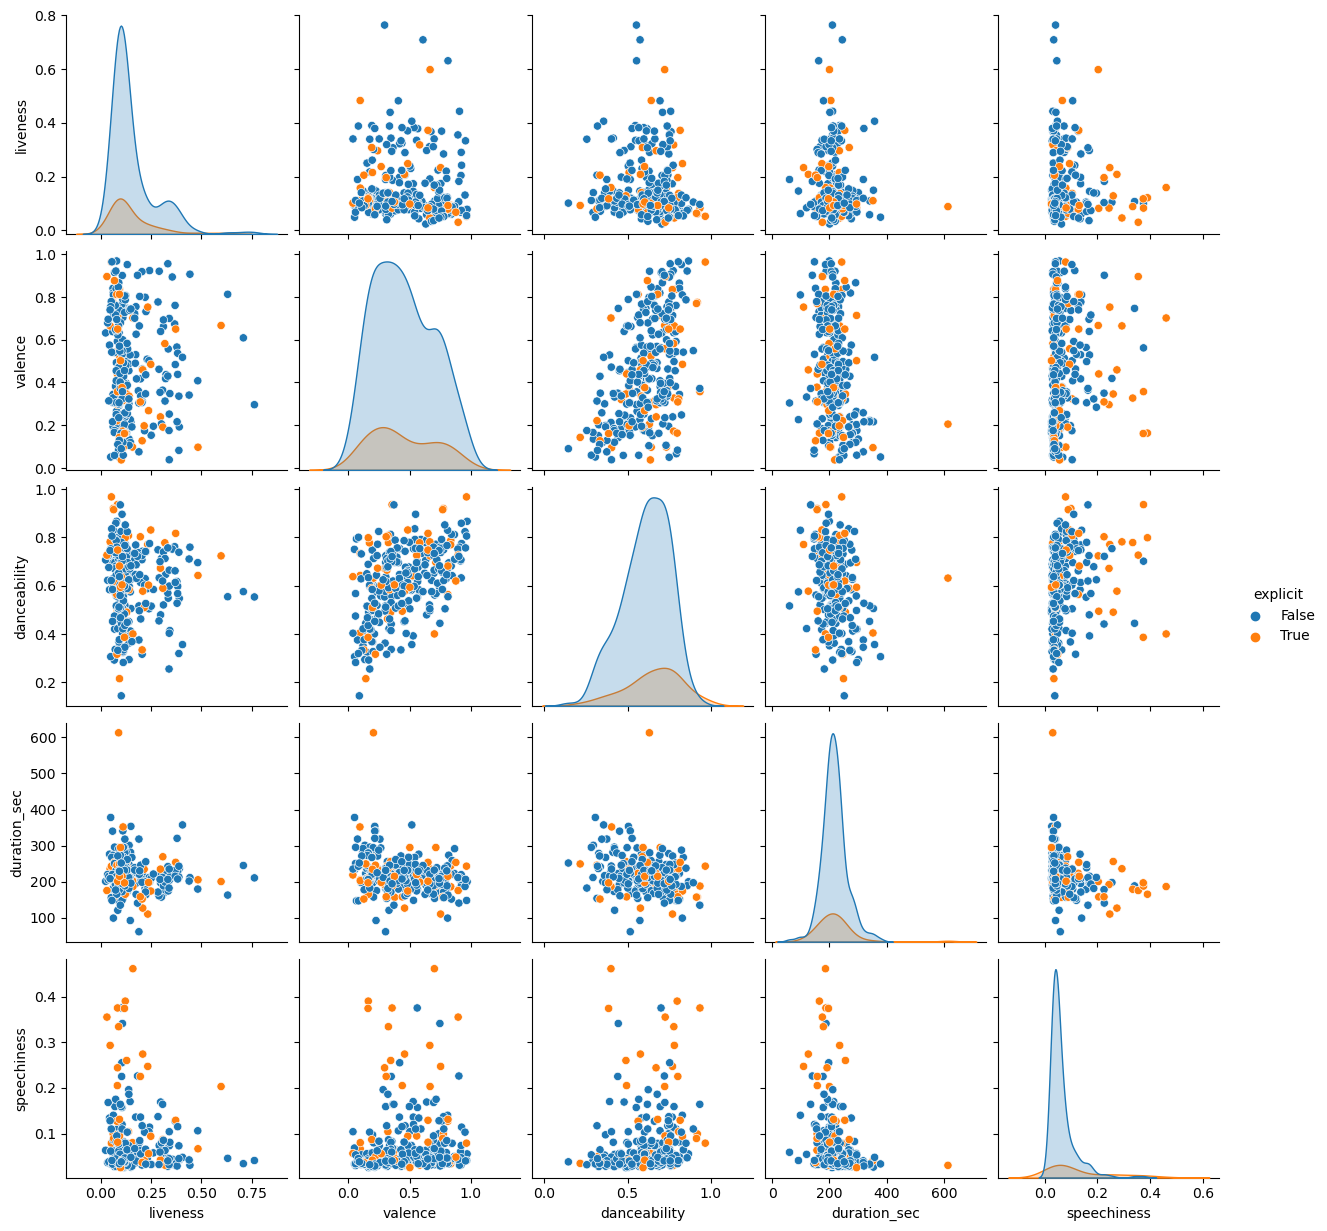

In [146]:
# Visualize via pairplot
sns.pairplot(df_pop_top_1pct[['explicit', 'liveness', 'valence', 'danceability', 'duration_sec', 'speechiness']], hue='explicit')

From the summary stats and the pair plot visualization we can draw the following observations about the top %1 most popular tracks:
- The mean of the "liveness" (likeness that the track was performed live) metric is ~0.15. This means that the most popular track are recorded/produced in a studio setting.  
- The mean of the "valence" (likeness that a track will make a listener feel happy) is ~0.45. This means the content of the most popular songs can be considered slightly "non-happy".
- The mean of the "danceability" (likeness that a track will make the listener want to dance), is ~0.62. This means the most popular songs have a tendency to be danceable.
- The mean of the "duration" (total play length of a track) is ~217 seconds or ~3:37 minutes. 
- The mean of the "speachiness" (likeness that the song contains spoken words) is nearly 0. This means, the most popular songs don't contain spoken words.

# Model Optimization

In [147]:
# Package imports
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

For the model optimization phase we will focus on the results obtained on the iteration #3. This means, we will aim to optimize the results from the KNN and Decision tree classifier, which were the best performing ones. However, we will also include the optimization of the LogisticRegression classifier since this was used for the determination of the most important features.  

To help us optimize our basic models, we will make use of **PipeLines** and **GridsSearchCV**. Also, to help make the process more efficient, we will define a custom function named "train_pipe" that will help us instantiate and train a pipe and get performance metrics. This function also provides a ROC visualization in addition to the confusion matrix: 

In [148]:
# Define a function that trains a pipeline and provide performance results
def train_pipe(pipe, X_train, y_train, X_test, y_test, display_visualizations = True):
    #Start timer
    start_time = perf_counter_ns()
    # Train pipe
    pipe.fit(X_train, y_train)
    #End timer
    end_time = perf_counter_ns()
    # Calculate 
    duration = end_time - start_time
    
    # Generate predictions
    prediction_test = pipe.predict(X_test)
    
    # Calculate train and test scores (accuracy)
    train_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)

    # Calculate precision and recall scores
    precision = precision_score(y_test, prediction_test, pos_label='no')
    recall = recall_score(y_test, prediction_test, pos_label='no')
    
    # Determine if visualizations need to be displayed
    if(display_visualizations):
        fig, ax = plt.subplots(1, 2, figsize = (20, 6))
        ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, ax = ax[0])
        RocCurveDisplay.from_estimator(pipe, X_test, y_test, ax = ax[1])
        ax[1].plot(np.array([0, 1]), np.array([0, 1]))    
    
    # Return pipe dictionary
    return {
        'pipe' : pipe, 
        'fit_duration' : duration,
        'train_score' : train_score,
        'test_score' : test_score,
        'precision' : precision,
        'recall' : recall
    }

In [149]:
# Define a function that trains a pipeline and provide performance results
def train_grid(pipe, param_grid, X_train, y_train, X_test, y_test, scoring = 'roc_auc', display_visualizations = True):
    
    # Instantiate grid
    grid = GridSearchCV(pipe, param_grid=param_grid, scoring = scoring)
    
    # start timer
    start_time = perf_counter_ns()
    # train grid
    grid.fit(X_train, y_train)
    #stop timer
    end_time = perf_counter_ns()
    # calculate duration of fit process
    duration = end_time - start_time
    
    # generate predictions
    prediction_test = grid.predict(X_test)
    
    # calculate accuracy
    train_score = grid.score(X_train, y_train)
    test_score = grid.score(X_test, y_test)

    # calculate precision and recall
    precision = precision_score(y_test, prediction_test, pos_label='no')
    recall = recall_score(y_test, prediction_test, pos_label='no')
    
    # If needed, display visualizations
    if(display_visualizations):
        fig, ax = plt.subplots(1, 2, figsize = (20, 6))
        ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test, ax = ax[0])
        RocCurveDisplay.from_estimator(grid.best_estimator_, X_test, y_test, ax = ax[1])
        ax[1].plot(np.array([0, 1]), np.array([0, 1]))    
    
    # return grid results
    return {
        'grid' : grid, 
        'fit_duration' : duration,
        'train_score' : train_score,
        'test_score' : test_score,
        'precision' : precision,
        'recall' : recall
    }

<h3> Optimize LogisticRegression Model</h3>

<p>We'll continue with the optimization of the LogisticRegression model. For this, we'll set the penalty mode to "l1" so that the model uses Lasso regularization. The reason for this is that Lasso minimizes the coefficients of the less important features to zero, which is ideal for feature selection. We'll also set the solver parameter to "liblinear" since it is the recommended solver for small datasets:</p>



In [150]:
# Instantiate LogisticRegression model with non-default parameters
lgr_optimized = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter = 1000)

# Genaret model output
lgr_optimized

LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

Next, we proceed with the training of the model by using the custom function **train_pipe**:

{'pipe': Pipeline(steps=[('selector',
                  SelectFromModel(estimator=LogisticRegression(max_iter=1000))),
                 ('lgr',
                  LogisticRegression(max_iter=1000, penalty='l1',
                                     random_state=42, solver='liblinear'))]),
 'fit_duration': 82123606,
 'train_score': 0.6719753676275415,
 'test_score': 0.6569517439082656,
 'precision': 0.6837304542069993,
 'recall': 0.8897771317829457}

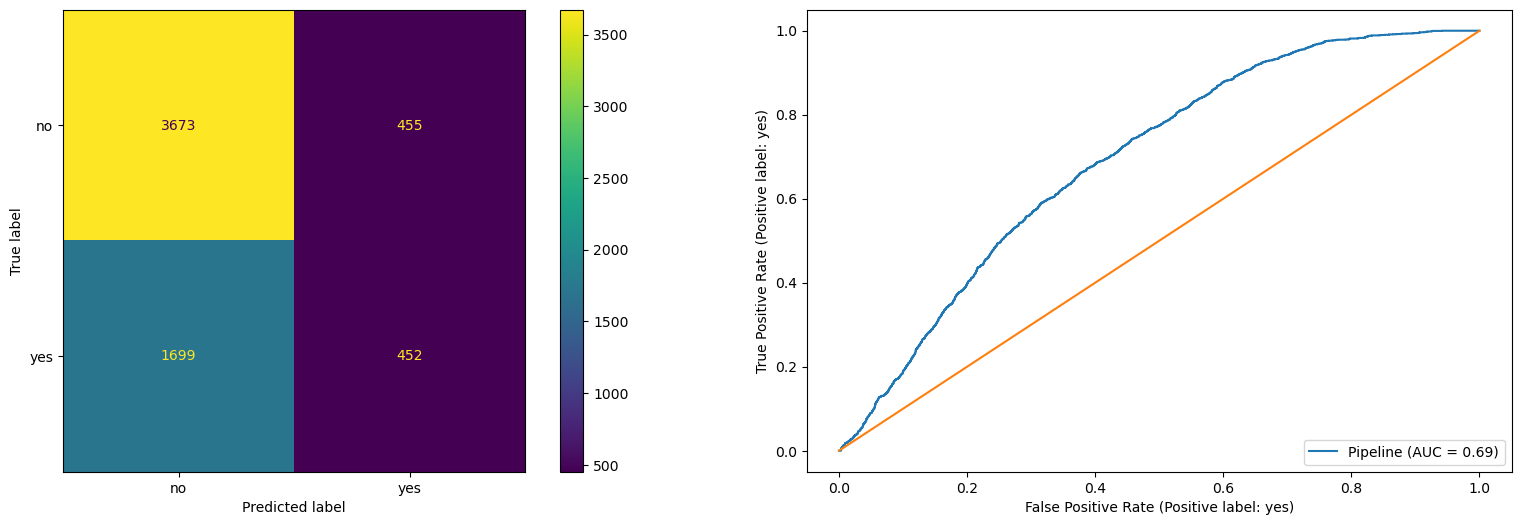

In [151]:
# Train LogisticRegression pipe by leveraging the "train_pipe" custom function
lgr_pop_pipe = train_pipe(
    Pipeline([
        ('selector', extractor),
        ('lgr', lgr_optimized)        
    ]), X_pop_train, y_pop_train, X_pop_test, y_pop_test)

# Genarate model output
lgr_pop_pipe

As it can be observed from the results, the default parameters used on the modeling phase produced better performance on this model.  

<h3> Optimize the DecisionTree Model</h3>


Next, we're going to proceed to find the optimal parameters for the DecisionTree classifier. In this case, we're passing an array of values so that the grid can determine the optimal parameters for <i>min_impurity_decrease</i> (which controls if a node should be splitted based on the amount of impurity that will result from such split), <i>max_depth</i> (the maximum depth of a tree) and <i>min_split</i>(which controls the minimum number of samples required to split an internal node).

{'grid': GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
              param_grid={'max_depth': [2, 5, 10, 15],
                          'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
                          'min_samples_split': [0.1, 0.2, 0.05]},
              scoring='roc_auc'),
 'fit_duration': 11661421413,
 'train_score': 0.7607089348604157,
 'test_score': 0.7394793840254579,
 'precision': 0.7811188811188812,
 'recall': 0.8117732558139535}

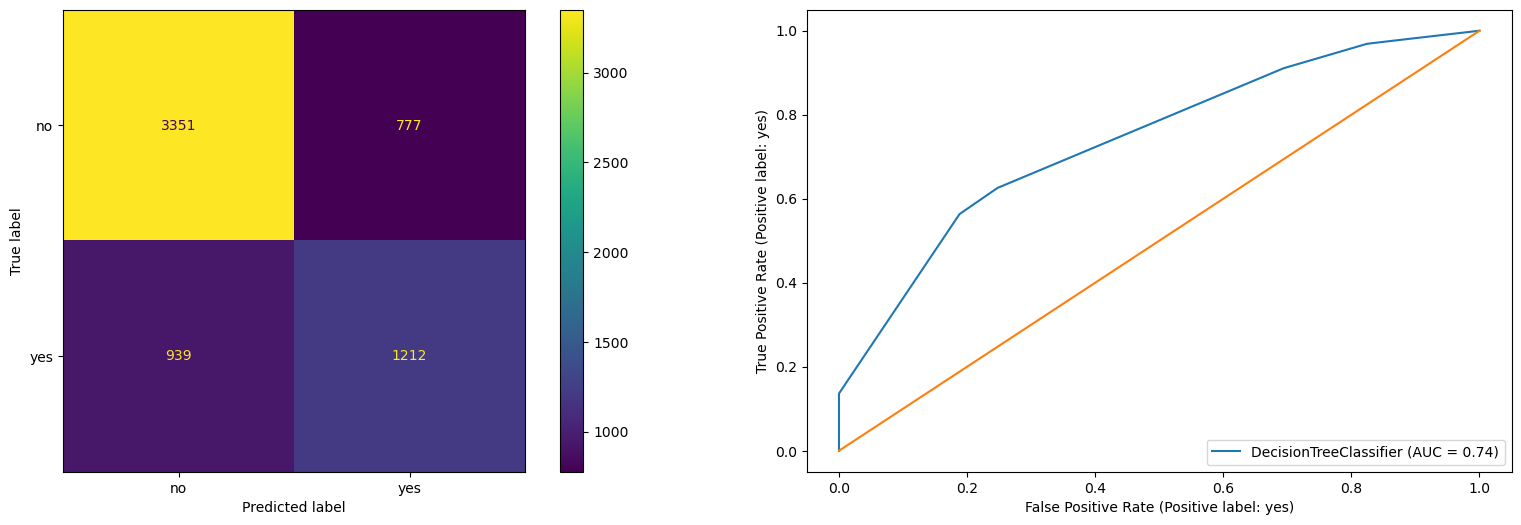

In [152]:
# Instanttiate and train the DecisionTree classier using the custom function:
dtree_pop_grid = train_grid(
    DecisionTreeClassifier(random_state=42), 
    {
        'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
        'max_depth': [2, 5, 10, 15],
        'min_samples_split': [0.1, 0.2, 0.05]
    },
    X_pop_train, 
    y_pop_train,
    X_pop_test, 
    y_pop_test,
    scoring = 'roc_auc'
)

# Display outut from model
dtree_pop_grid

As it can be observed, the optimization of this model avoided the overfitting saw during the modeling phase. However, the performance of this model is still below the one performance of the KNN classifier.   

<h3> Optimize the KNN Classifier</h3>


The KNN classifier was one of the top performing models during the modeling phase. Therefore, we will use GridSearch to try different <i>n_neighbors</i> values to see if we improve the performance even further:

{'grid': GridSearchCV(estimator=KNeighborsClassifier(),
              param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                          21]},
              scoring='roc_auc'),
 'fit_duration': 36764802051,
 'train_score': 0.9973726091601492,
 'test_score': 0.987030268506806,
 'precision': 0.9997095556200988,
 'recall': 0.8338178294573644}

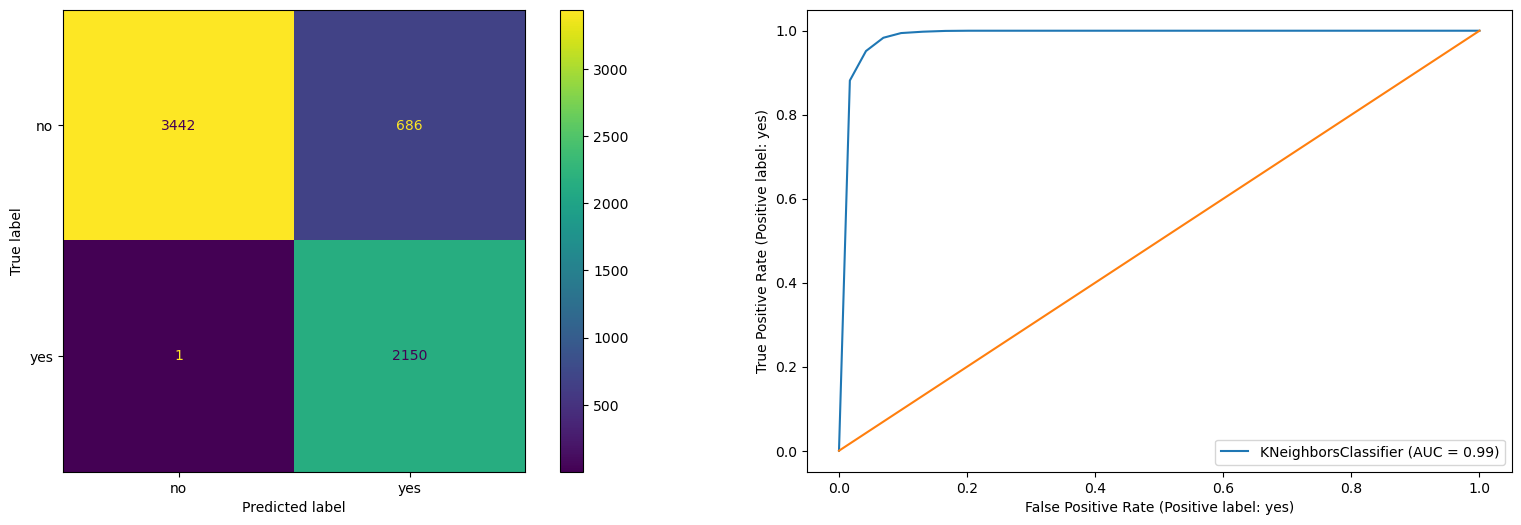

In [153]:
# Instanttiate and train the KNN classier using the custom function:
knn_pop_grid = train_grid(
    KNeighborsClassifier(), 
    {'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21]},
    X_pop_train, 
    y_pop_train,
    X_pop_test, 
    y_pop_test,
    scoring = 'roc_auc'
)

# Display outut from model
knn_pop_grid

In [154]:
# Output best estimator information
knn_pop_grid['grid'].best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [155]:
# Display performance from the modeling phase (prior to optimization)
results_pop_df.loc[2]

Model                   KNN
Train Time (ns)    30418200
Train Accuracy     0.942401
Test Accuracy      0.923077
Precision          0.999452
Recall             0.883479
Name: 2, dtype: object

As it can be seen from the results above, the optimization of the KNN classifier resulted an overal improvement of the model by using 11 n_neighbors, instead of 5 (default). 

# Further optimization: Neural Networks

Even though the optimization of the KNN classifier produced a highly performing model, it is worth exploring further optimization opportunities via neural networks. The approach followed on this phase is based on the article [Binary Classification Tutorial with the Keras Deep Learning Library](https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/) by Jason Brownlee

In [158]:
# Import Tensorflow libraries
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

For this optimization process, we will train three neural networks using 1, 2 and three layers respectively. We'll set the epochs to "100", use the <i>binary cross entropy</i> loss function and measure the performance via the accuracy metric:

In [159]:
# Convert target feature to a numeric value
y_pop_train_num = np.where(y_pop_train == 'yes', 0, 1)
y_pop_test_num = np.where(y_pop_test == 'yes', 0, 1)

## Neural Network: 1-Layer

In [160]:
# First neural network (Using 1 layer)
neural_1l = Sequential([
    Dense(60, 'relu'),
    Dense(1, 'sigmoid'),
])

# Complile
neural_1l.compile(loss='bce', metrics=['acc'])

# Train model
history_1l = neural_1l.fit(X_pop_train, y_pop_train_num, epochs=100, verbose=0, validation_data=(X_pop_test, y_pop_test_num))


In [161]:
# Output model accuracy
history_1l.history['val_acc'][-1]

0.9202102422714233

## Neural Network: 2-Layer


In [162]:
# Second neural network (Using 2 layers)
neural_2l = Sequential([
    Dense(60, 'relu'),
    Dense(30, 'relu'),    
    Dense(1, 'sigmoid'),
])

#Compile
neural_2l.compile(loss='bce', metrics=['acc'])

# Train model
history_2l = neural_2l.fit(X_pop_train, y_pop_train_num, epochs=100, verbose=0, validation_data=(X_pop_test, y_pop_test_num))


In [163]:
# Output model accuracy
history_2l.history['val_acc'][-1]

0.9691033363342285

## Neural Network: 3-Layer

In [164]:
# Third neural network (Using 3 layers)
neural_3l = Sequential([
    Dense(60, 'relu'),
    Dense(30, 'relu'),    
    Dense(10, 'relu'),
    Dense(1, 'sigmoid'),
])

# Compile
neural_3l.compile(loss='bce', metrics=['acc'])

# Train
history_3l = neural_3l.fit(X_pop_train, y_pop_train_num, epochs=100, verbose=0, validation_data=(X_pop_test, y_pop_test_num))


In [165]:
# Output model accuracy
history_3l.history['val_acc'][-1]

0.9633699655532837

## Results

The following visualization shows the accuracy improvement for the three neural networks through the 100 epochs:  

Text(0, 0.5, 'accuracy')

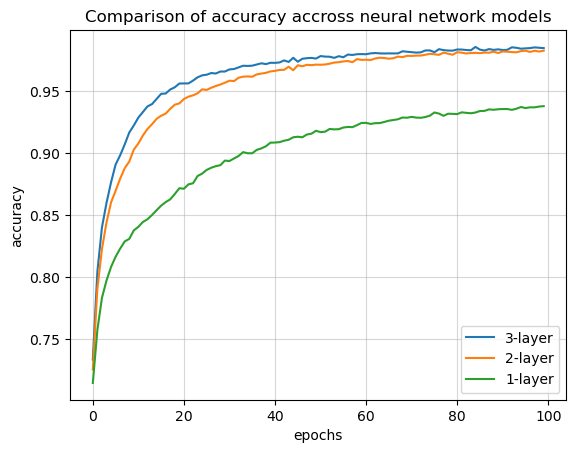

In [166]:
plt.plot(history_3l.history['acc'], label='3-layer')
plt.plot(history_2l.history['acc'], label='2-layer')
plt.plot(history_1l.history['acc'], label='1-layer')
plt.grid(alpha=0.5)
plt.legend()
plt.title('Comparison of accuracy accross neural network models')
plt.xlabel('epochs')
plt.ylabel('accuracy')

As it can be observed, at 100 epochs none of the neural networks were able to match the ~0.987 accuracy score obtained from the KNN classifier after the optimization. Therefore, we can conclude the KNN is the best model to achive for the prediction of a hit song of the pop genre.

# Evaluation

Now that we have determined that the optimized KNN model is able to predict with an accuracy of ~98.7% if a pop song has the potential to become a hit or not, we're ready to evaluate the model.

The Billboards website provides a tool to retrieve the Chart History for a specific artist. This tool will allow us to cross validate the predictions of our model. As reminder, the Spotify dataset we're using on this analysis is valid through December 20, 2023. 


First, we're going to find out who were the artists of the top 100 most popular pop songs in the Spotify dataset. We can retrieve this information from the one of the subsets already created during the data preparation phase: 

In [392]:
# Create dataframe with top 100 most popular songs
df_pop_top_100 = df_pop.sort_values(by='track_popularity', ascending=False).head(100)

In [393]:
# Verify structure
df_pop_top_100

,duration_sec,genre_0,acousticness,danceability,energy,key,liveness,mode,speechiness,tempo,time_signature,valence,explicit,track_popularity
364635,241.106,dance pop,0.1640,0.336,0.6270,7.0,0.0708,1.0,0.0384,150.273,4.0,0.3500,False,99.0
374458,178.426,pop,0.1170,0.552,0.7020,9.0,0.1050,1.0,0.1570,169.994,4.0,0.5640,False,99.0
370117,222.369,art pop,0.9590,0.444,0.0911,0.0,0.0980,1.0,0.0307,78.403,4.0,0.1420,False,94.0
364438,167.303,pop,0.3420,0.520,0.7310,6.0,0.3110,0.0,0.0557,173.930,4.0,0.6620,False,94.0
374556,229.477,pop,0.0504,0.596,0.6580,0.0,0.1270,1.0,0.0360,100.012,4.0,0.1760,False,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372407,351.640,art pop,0.5420,0.404,0.6640,1.0,0.1100,1.0,0.0407,107.747,4.0,0.0949,True,84.0
370786,191.600,barbadian pop,0.1100,0.671,0.3140,5.0,0.0825,0.0,0.2440,110.898,4.0,0.2960,True,84.0
372476,202.192,art pop,0.4040,0.641,0.5590,7.0,0.0937,0.0,0.0355,144.982,4.0,0.5230,True,84.0
374857,230.177,pop,0.0068,0.651,0.8550,5.0,0.0759,1.0,0.0538,121.980,4.0,0.6980,False,84.0


Next, we're going to explore which artists are the most prevalent within these top 100 songs:   

Text(0, 0.5, 'Artist')

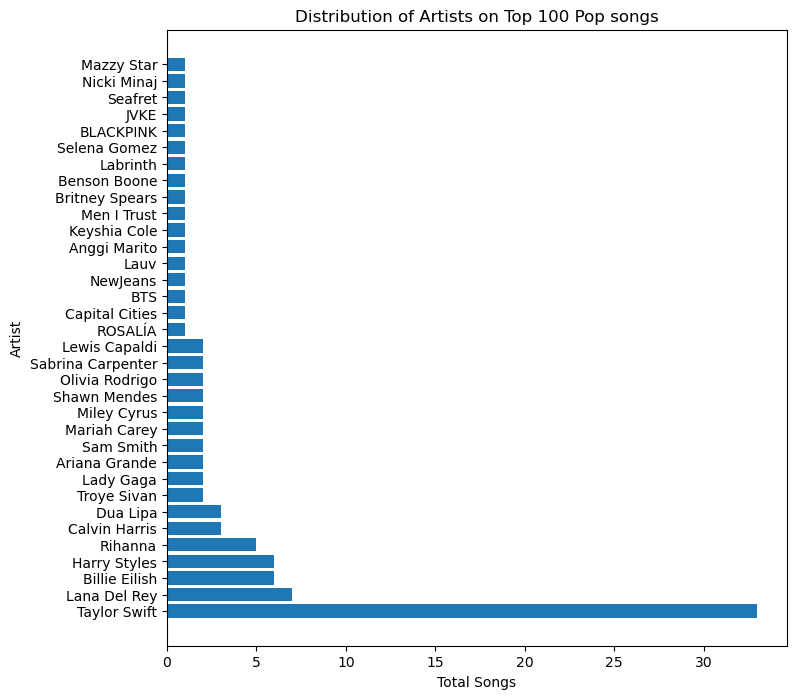

In [406]:
# Generate horizontal barchart to visualize results
plt.figure(figsize=(8,8))
plt.barh(y=df.iloc[df_pop_top_100.index]['name'].value_counts().index, width=df.iloc[df_pop_top_100.index]['name'].value_counts())
plt.title("Distribution of Artists on Top 100 Pop songs")
plt.xlabel("Total Songs")
plt.ylabel("Artist")

From the previous visualization, it is clear that Taylor Swift is the artist with most popular songs on Spotify, followed by Lana Del Rey, Billie Eilish, Harry Styles and Rihanna. 

At this point, we are going to create a new dataframe that will contain the columns we used for the training of our models, plus the name (artist name) and track_name columns. This will allow us to query the entries by track name and artist name:   

In [407]:
# Create dataframe with features used during modeling, and add name and track_name (exclude "hit" column)   
df_searchable = df[np.append(['name', 'track_name'], np.array(df_pop_final.columns)[:-1])].dropna()

In [408]:
# Verify dataframe structure
df_searchable.head(10)

,name,track_name,duration_sec,acousticness,danceability,energy,key,liveness,mode,speechiness,tempo,time_signature,valence,explicit
0,AB,Intro,92.063,0.03050,0.622,0.554,5.0,0.3920,0.0,0.414,72.546,4.0,0.382,True
1,AB,Play It Cool,125.320,0.01120,0.899,0.701,11.0,0.1530,0.0,0.138,101.581,4.0,0.193,True
2,AB,3 Peat,139.800,0.08150,0.782,0.716,10.0,0.1260,0.0,0.382,99.789,4.0,0.835,True
3,AB,Affiliated,147.777,0.00413,0.944,0.582,1.0,0.0961,1.0,0.297,105.010,4.0,0.252,True
4,AB,Springfield,102.600,0.01290,0.527,0.641,5.0,0.0869,0.0,0.730,172.723,4.0,0.380,True
5,AB,Decisions,131.287,0.02180,0.867,0.610,7.0,0.1310,1.0,0.327,100.967,4.0,0.259,True
6,AB,Gallery Department,134.328,0.02230,0.896,0.641,1.0,0.3510,1.0,0.190,100.526,4.0,0.301,True
7,AB,Dead Body,163.422,0.32300,0.873,0.526,1.0,0.2470,1.0,0.260,93.999,4.0,0.286,True
8,AT,Mellow,182.909,0.76400,0.763,0.532,10.0,0.1150,0.0,0.183,126.098,4.0,0.500,True
9,AT,Egomaniac,190.511,0.01040,0.695,0.706,6.0,0.1100,1.0,0.248,91.972,4.0,0.639,True


Next, we're going to create a couple of custom function to help the prediction process more efficient:

In [472]:
def predict_hit_songs_by_artist(artist_name, datasource, model, transformer):
    # Create dataframe that contains only songs by the artist in question
    df_artist = datasource.query('name == "'+ artist_name + '"')
    
    # Transform dataframe
    X_artist = transformer.fit_transform(df_artist.drop(['name', 'track_name'], axis=1))
    
    # Make predictions
    hit_predictions = model.predict(X_artist)
    
    # Add predictions to artist dataframe
    df_artist['hit'] = hit_predictions
    
    # Return hit songs
    return df_artist

In [ ]:
def print_hit_chart_df(main_datasource, hit_datasource, track_popularity = 87, columns=['name', 'track_name', 'track_popularity']):
    return main_datasource.iloc[hit_datasource[hit_datasource['hit'] == 'yes'].index].query('track_popularity >= '+ str(track_popularity)).sort_values(by='track_popularity', ascending=False)[columns]

With these functions and dataframes in place, we're ready to cross validate the prediciton we'll obtain from our model. However, since this process will be manual, we're going to focus on the three top pop artists, namely Taylor Swift, Lana Del Rey and Billie Eilish.

## Taylor Swift
<b>Biography</b>
<p>Taylor Swift debuted with her self-titled album in October 2006, and first appeared on the Billboard 200 on the Nov. 11, 2006-dated chart. The album's lead single, "Tim McGraw," was her first Hot 100-charting song, which debuted on the Sept. 23, 2006-dated tally. She was nominated for the best new artist Grammy in 2007, but lost to Amy Winehouse. She won her first Grammys in 2009, taking album of the year and best country album for sophomore release 'Fearless,' as well as best female country vocal performance and best country song for single "White Horse." The pop superstar's birthday is Dec. 13, 1989 — with 13 famously being her favorite number, and '1989' a chart-topping album. The singer-songwriter — who stands at a height of 5'11" — was born in Reading, Penn., to Scott and Andrea Swift. Since her first-ever recorded duet with Colbie Caillat -- "Breathe" off of 'Fearless' -- Swift has worked with many artists, including Jack Antonoff and Aaron Dessner, who are frequent collaborators.</p>

### Chart History:
<img src="images/billboard-chart-history-taylor-swift.png"/>

<i>Source: https://www.billboard.com/artist/taylor-swift/</i>

### Model Predictions

In [490]:
# Make predictions
taylor_swift_hits = predict_hit_songs_by_artist('Taylor Swift', df_searchable, knn_pop_grid['grid'], transformer_pop)

# Print hit chart
print_hit_chart_df(df, taylor_swift_hits, 80, ['name', 'track_name', 'track_popularity']).head(25)

,name,track_name,track_popularity
374458,Taylor Swift,Cruel Summer,99.0
374556,Taylor Swift,Is It Over Now? (Taylor'S Version) (From The V...,94.0
375001,Taylor Swift,Anti-Hero,92.0
374406,Taylor Swift,You’Re Losing Me (From The Vault),92.0
374897,Taylor Swift,Now That We Don'T Talk (Taylor'S Version) (Fro...,91.0
374396,Taylor Swift,Don’T Blame Me,91.0
375058,Taylor Swift,"""Slut!"" (Taylor'S Version) (From The Vault)",90.0
374833,Taylor Swift,Style (Taylor'S Version),88.0
374275,Taylor Swift,Karma,88.0
374542,Taylor Swift,Say Don'T Go (Taylor'S Version) (From The Vault),88.0


## Lana Del Rey
<b>Biography</b>
<p>Lana Del Rey (real name Elizabeth Grant) was born in New York City, and grew up in Lake Placid, N.Y. Her birthday is June 21, 1985, and her height is 5'7". She first began releasing music as Lizzy Grant, with EP 'Kill Kill' arriving in 2008. By 2010, she had rebranded herself as Lana Del Rey, and released her self-titled debut studio album; the album did not chart. Two years later, her sophomore album 'Born to Die' arrived, debuting and peaking at No. 2 on the Billboard 200. The album's first single, "Video Games," was her breakthrough song, making it to No. 91 on the Hot 100. Since then, she's accumulated several No. 1 albums (including 2014's 'Ultraviolence' and 2017's 'Lust for Life'), and worked with artists ranging from Taylor Swift and Miley Cyrus to Ariana Grande, with The Weeknd being a frequent collaborator. Del Rey has been nominated for multiple Grammys, including best pop vocal album (for 'Lust for Life') and album of the year (2019's 'Norman F--king Rockwell!'). She received the Visionary Award at the 2023 Billboard Women in Music event.</p>

### Chart History:
<img src="images/billboard-chart-history-lana-del-rey.png"/>

Source: https://www.billboard.com/artist/lana-del-rey/

In [491]:
# Make Predictions
lana_del_rey_hits = predict_hit_songs_by_artist('Lana Del Rey', df_searchable, knn_pop_grid['grid'], transformer_pop)

# Print hit chart
print_hit_chart_df(df, lana_del_rey_hits, 80, ['name', 'track_name', 'track_popularity']).head(25)

,name,track_name,track_popularity
372366,Lana Del Rey,Say Yes To Heaven,89.0
372397,Lana Del Rey,Young And Beautiful,88.0
372415,Lana Del Rey,Cinnamon Girl,86.0
372539,Lana Del Rey,West Coast,86.0
372407,Lana Del Rey,Brooklyn Baby,84.0
372476,Lana Del Rey,Doin' Time,84.0
372595,Lana Del Rey,Chemtrails Over The Country Club,82.0
372543,Lana Del Rey,Art Deco,80.0


## Billie Eilish


<b>Biography</b>
<p>Billie Eilish (real name Billie Eilish Pirate Baird O'Connell) was born in Los Angeles on Dec. 18, 2001, and stands at a height of 5'4". She found fame as a young teen with her song "Ocean Eyes," which went viral on SoundCloud in 2015. Her debut studio album, 'When We All Fall Asleep, Where Do We Go?' was written and recorded with her brother and frequent collaborator, Finneas. It was released in March 2019, and debuted at No. 1 on the April 13, 2019-dated Billboard 200 chart. Though "You Should See Me in a Crown," the first single off the set, peaked at No. 41 on the Hot 100, her fifth one -- "Bad Guy" -- became her first No. 1 on the chart, reaching the top on the Aug. 24, 2019, tally. The critically acclaimed album earned her six 2020 Grammy nods, five of which she took home: record of the year and song of the year ("Bad Guy"), album of the year and best pop vocal album, and best new artist. Those Grammy accolades made her the youngest artist to get nominations for and win each of the four general-field categories within one eligibility period, as well as becoming the only woman at the time to win the Big Four awards on one night.</p>

### Chart History:
<img src="images/billboard-chart-history-billie-eilish.png"/>

Source: https://www.billboard.com/artist/billie-eilish/

### Model Predictions:

In [495]:
# Make predictions
billie_eilish = predict_hit_songs_by_artist('Billie Eilish', df_searchable, knn_pop_grid['grid'], transformer_pop)

# Print hit chart
print_hit_chart_df(df, billie_eilish, 50, ['name', 'track_name', 'track_popularity']).head(25) 

,name,track_name,track_popularity
370099,Billie Eilish,Hotline (Edit),85.0
370078,Billie Eilish,Bad Guy,84.0
370070,Billie Eilish,Idontwannabeyouanymore,82.0
370090,Billie Eilish,Watch,82.0
370115,Billie Eilish,Billie Bossa Nova,80.0
370064,Billie Eilish,You Should See Me In A Crown,79.0
370087,Billie Eilish,Happier Than Ever - Edit,79.0
370106,Billie Eilish,Listen Before I Go,78.0
370107,Billie Eilish,Hostage,77.0
370104,Billie Eilish,Nda,76.0


# Conclusion

TODO

# Next Steps

[TODO]
At this stage of the project we have produced a clean dataset that contains what we believe to be the most relevant features to create a model that can predict with high accuracy if a song has the potential to be a hit. 

As it was found, the most determining factor seems to be the song genre, from which the "pop" genre seems to be the strongest genre among hit songs. However, this dataset provides a rich amount of information about track characteristics, including tempo, key, mode, energy, etc., that we believe are worth exploring aside from song genre. Therefore, as a next step, we'll perform another iteration where the song genre is ignored to see if we can obtain valuable information about the characteristics of hit songs.

Additionally, we will look into validating our model with information obtained from the Billboard music charts since these charts are considered standards in the music industry. 